## Mounting and Export

In [ ]:
# load folder gdrive /content/drive/MyDrive/HSLU/CV/Project and go to this

import os

# Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')

# Change directory to the specified folder
os.chdir('/content/drive/MyDrive/HSLU/CV/Project')

# Verify the current working directory
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/HSLU/CV/Project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
!ls

CVProject_letters.ipynb      emnist-balanced-train.csv	 emnist-letters-train.csv
emnist-balanced-mapping.txt  emnist-letters-mapping.txt  img
emnist-balanced-test.csv     emnist-letters-test.csv	 saved_models


## Letters datasets with combined classes (Upper-case and lower-case letters)

The EMNIST Letters dataset merges a balanced set of the uppercase and lowercase letters into a single 26-class task.

train: 88,800
test: 14,800
total: 103,600
classes: 37

Loading

In [ ]:

def load_image_data_from_csv(csv_file_path):
  """
  Returns:
  A tuple with labels and images
  """

  df = pd.read_csv(csv_file_path)
  labels = np.array(df.iloc[:, 0].tolist())
  pixel_data = df.iloc[:, 1:].values
  images = np.array([np.transpose(np.reshape(row, (28, 28))) for row in pixel_data])
  return labels, images


# labels, images = load_image_data_from_csv('emnist-letters-train.csv')

# print(labels[0])  # Print the label of the first image
# print(images[0])  # Print the pixel data of the first image (28x28 array)

In [ ]:

train_labels, train_images = load_image_data_from_csv('emnist-letters-train.csv')
test_labels, test_images = load_image_data_from_csv('emnist-letters-test.csv')


In [ ]:
np.unique(train_labels)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

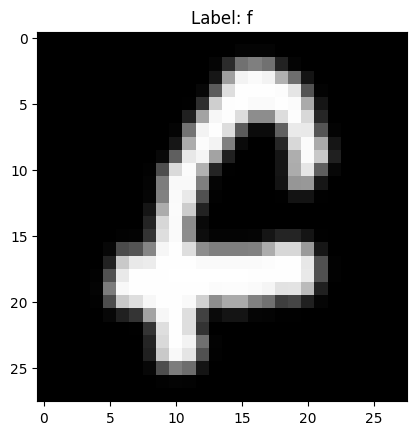

In [ ]:
image_index = 99

# Display the image
plt.imshow(train_images[image_index], cmap='gray')
plt.title(f"Label: {chr(train_labels[image_index]+64)}") #label into character
plt.show()

In [ ]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Simple CNN architecture
model1 = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 letters
])

# Compile the model
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
model1.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model1.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - accuracy: 0.6629 - loss: 1.1606 - val_accuracy: 0.8626 - val_loss: 0.4291
Epoch 2/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.8861 - loss: 0.3535 - val_accuracy: 0.8838 - val_loss: 0.3621
Epoch 3/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 77s 34ms/step - accuracy: 0.9073 - loss: 0.2839 - val_accuracy: 0.8909 - val_loss: 0.3261
Epoch 4/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9187 - loss: 0.2474 - val_accuracy: 0.9044 - val_loss: 0.3009
Epoch 5/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9268 - loss: 0.2185 - val_accuracy: 0.9070 - val_loss: 0.2854
463/463 - 4s - 8ms/step - accuracy: 0.9070 - loss: 0.2854

Test accuracy: 0.9069531559944153


90% of accuracy on the first run, not that bad. Where are mistakes?

In [ ]:
# Predict labels for the test set
predicted_labels = np.argmax(model1.predict(test_images), axis=1)
# Convert numerical labels to characters
predicted_chars = [chr(label + 64) for label in predicted_labels]
true_chars = [chr(label + 64) for label in test_labels]

463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


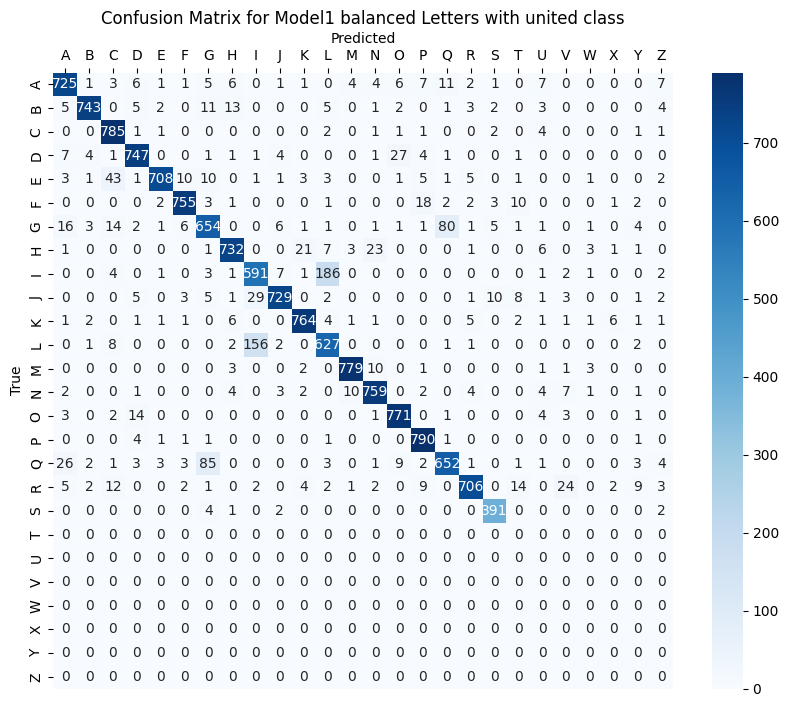

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(true_chars, predicted_chars)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(list(set(predicted_chars))), yticklabels=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model1 balanced Letters with united class')
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to top
plt.show()

L was interpreted as I and other way around, obviously because that differnce would be hardly recognized even by human, actually there is no difference :) Let's see on some examples

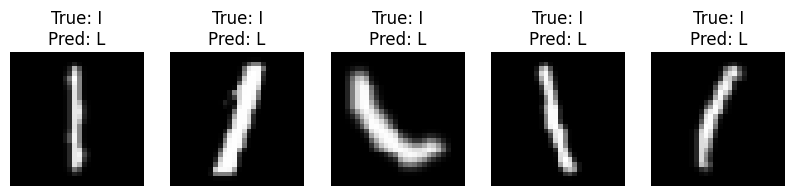

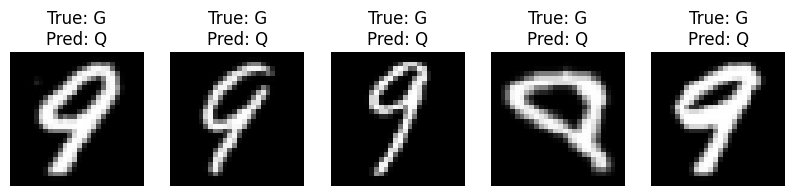

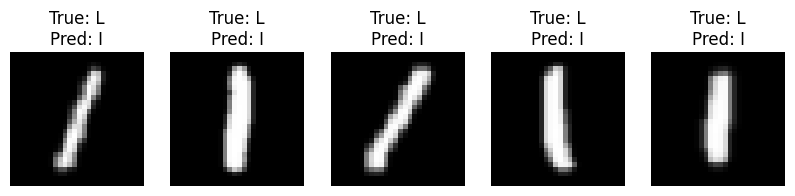

In [ ]:
# Function to display a misclassified image
def show_misclassified_images(true_chars, predicted_chars, test_images, true_char, pred_char, num_images=5):
    misclassified_indices = [i for i, (true, pred) in enumerate(zip(true_chars, predicted_chars)) if true == true_char and pred == pred_char]

    # Plot the first few misclassified images
    plt.figure(figsize=(10, 10))
    for i, index in enumerate(misclassified_indices[:num_images]):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_char}\nPred: {pred_char}")
        plt.axis('off')
    plt.show()

# Show misclassified 'I' as 'L'
show_misclassified_images(true_chars, predicted_chars, test_images, 'I', 'L')

# Show misclassified 'G' as 'Q'
show_misclassified_images(true_chars, predicted_chars, test_images, 'G', 'Q')

# Show misclassified 'L' as 'I'
show_misclassified_images(true_chars, predicted_chars, test_images, 'L', 'I')



Ok, l and I seem to be undisinguishable. But with g and q it seems that it could be improved. Let's try a bit more complicated model

In [ ]:
train_labels -= 1
test_labels -= 1

In [ ]:
# another architecture with additional layers

# # Normalize the images
# train_images = train_images / 255.0
# test_images = test_images / 255.0


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 letters
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# # Reshape images to include channel dimension (1 for grayscale)
# train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
# test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 88s 62ms/step - accuracy: 0.6830 - loss: 1.0660 - val_accuracy: 0.8851 - val_loss: 0.3399
Epoch 2/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.9070 - loss: 0.2808 - val_accuracy: 0.9057 - val_loss: 0.2795
Epoch 3/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.9249 - loss: 0.2176 - val_accuracy: 0.9139 - val_loss: 0.2584
Epoch 4/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 141s 60ms/step - accuracy: 0.9347 - loss: 0.1882 - val_accuracy: 0.9198 - val_loss: 0.2336
Epoch 5/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.9409 - loss: 0.1692 - val_accuracy: 0.9193 - val_loss: 0.2402
463/463 - 7s - 15ms/step - accuracy: 0.9193 - loss: 0.2402

Test accuracy: 0.9193188548088074


Ok, now it is a bit better, so where is an error?

In [ ]:
# Predict labels for the test set
predicted_labels = np.argmax(model.predict(test_images, verbose = 0), axis=1)
# Convert numerical labels to characters
predicted_chars = [chr(label + 64) for label in predicted_labels]
true_chars = [chr(label + 64) for label in test_labels]

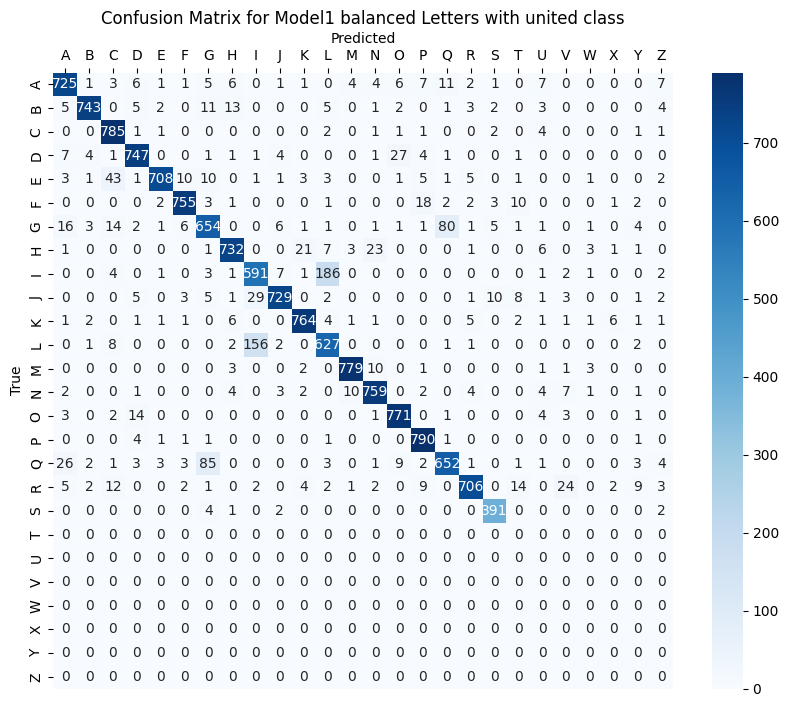

In [ ]:
conf_matrix = confusion_matrix(true_chars, predicted_chars)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(list(set(predicted_chars))), yticklabels=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model1 balanced Letters with united class')
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to top
plt.show()

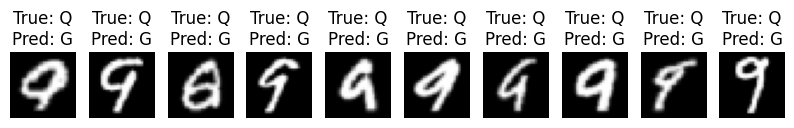

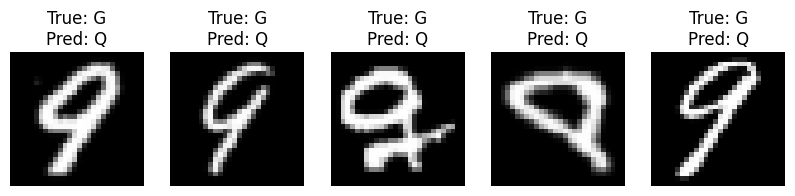

In [ ]:
# Show misclassified 'Q' as 'G'
show_misclassified_images(true_chars, predicted_chars, test_images, 'Q', 'G', num_images = 10)

# Show misclassified 'G' as 'Q'
show_misclassified_images(true_chars, predicted_chars, test_images, 'G', 'Q')


What if we will not combine Upper and lower cases in one class?

## Separate classes for Upper and lower case

In [ ]:
# Load training and test data
train_labels, train_images = load_image_data_from_csv('emnist-balanced-train.csv')
test_labels, test_images = load_image_data_from_csv('emnist-balanced-test.csv')

#### Mapping

In [ ]:
# get real characters for labels, find mapping from emnist-balanced-mapping.txt where in first column is label and in second is ascii code

# read emnist-balanced-mapping.txt as dictionary where first column is key and second is value

mapping = {}
with open('emnist-balanced-mapping.txt', 'r') as file:
    for line in file:
        key, value = line.strip().split()
        mapping[key] = chr(int(value))

print(len(mapping))

mapping


47


{'0': '0',
 '1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 '6': '6',
 '7': '7',
 '8': '8',
 '9': '9',
 '10': 'A',
 '11': 'B',
 '12': 'C',
 '13': 'D',
 '14': 'E',
 '15': 'F',
 '16': 'G',
 '17': 'H',
 '18': 'I',
 '19': 'J',
 '20': 'K',
 '21': 'L',
 '22': 'M',
 '23': 'N',
 '24': 'O',
 '25': 'P',
 '26': 'Q',
 '27': 'R',
 '28': 'S',
 '29': 'T',
 '30': 'U',
 '31': 'V',
 '32': 'W',
 '33': 'X',
 '34': 'Y',
 '35': 'Z',
 '36': 'a',
 '37': 'b',
 '38': 'd',
 '39': 'e',
 '40': 'f',
 '41': 'g',
 '42': 'h',
 '43': 'n',
 '44': 'q',
 '45': 'r',
 '46': 't'}

In [ ]:
str(np.unique(train_labels))

[mapping[str(label)] for label in np.unique(train_labels)]

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'd',
 'e',
 'f',
 'g',
 'h',
 'n',
 'q',
 'r',
 't']

In [ ]:
# with open('emnist-balanced-mapping.txt', 'r') as file:
#     for line in file:
#       key, value = line.strip().split()
#       print(int(key) - int(value))

-48
-48
-48
-48
-48
-48
-48
-48
-48
-48
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-55
-61
-61
-62
-62
-62
-62
-62
-67
-69
-69
-70


In [ ]:
# # Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(47, activation='softmax')  # 37 distinct letters + 10 digits
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/5
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6109 - loss: 1.3718 - val_accuracy: 0.8297 - val_loss: 0.5037
Epoch 2/5
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8451 - loss: 0.4459 - val_accuracy: 0.8552 - val_loss: 0.4102
Epoch 3/5
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8649 - loss: 0.3791 - val_accuracy: 0.8650 - val_loss: 0.3887
Epoch 4/5
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8744 - loss: 0.3395 - val_accuracy: 0.8745 - val_loss: 0.3694
Epoch 5/5
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8860 - loss: 0.3098 - val_accuracy: 0.8683 - val_loss: 0.3756
588/588 - 2s - 3ms/step - accuracy: 0.8683 - loss: 0.3756

Test accuracy: 0.8683440685272217


That is even slightly worse. Where are problems?

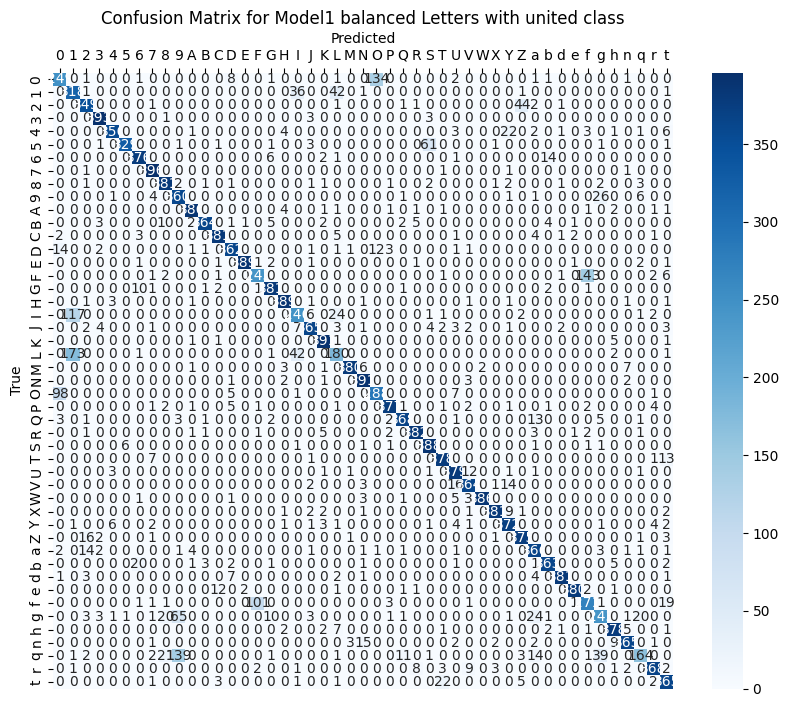

In [ ]:
# Predict labels for the test set
predicted_labels = np.argmax(model.predict(test_images, verbose = 0), axis=1)
# Convert numerical labels to characters
predicted_chars = [mapping[str(label)] for label in predicted_labels]
true_chars = [mapping[str(label)] for label in test_labels]

conf_matrix = confusion_matrix(true_chars, predicted_chars)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(list(set(predicted_chars))), yticklabels=sorted(list(set(true_chars))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model1 balanced Letters with united class')
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to top
plt.show()

Obviously we have now problems with 1 and 0 which are highlu similart to l, I and O. What if we exclude them?

In [ ]:
print(len(np.unique(train_labels)))
print(len(np.unique(test_labels)))
print(len(train_labels))
print(len(test_labels))
print(len(train_images))
print(len(test_images))

47
47
112799
18799
112799
18799


### Only letters (Excluding digits, should be executed!)

In [ ]:
# excluding numbers train_labels, train_images, test_labels, test_images with lavels <10

train_mask = np.where(train_labels >= 10)
test_mask = np.where(test_labels >= 10)

train_labels = train_labels[train_mask]
train_images = train_images[train_mask]
test_labels = test_labels[test_mask]
test_images = test_images[test_mask]

In [ ]:
# execute necesseraly! to avoid errors
train_labels -= 10
test_labels -= 10

In [ ]:
# # Normalize the images
# train_images = train_images / 255.0
# test_images = test_images / 255.0


# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 37 distinct letters
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


Epoch 1/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6686 - loss: 1.1712 - val_accuracy: 0.8784 - val_loss: 0.3994
Epoch 2/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8920 - loss: 0.3330 - val_accuracy: 0.8898 - val_loss: 0.3399
Epoch 3/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9078 - loss: 0.2768 - val_accuracy: 0.9013 - val_loss: 0.3078
Epoch 4/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9176 - loss: 0.2408 - val_accuracy: 0.9061 - val_loss: 0.2871
Epoch 5/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9221 - loss: 0.2209 - val_accuracy: 0.9041 - val_loss: 0.2987
463/463 - 1s - 2ms/step - accuracy: 0.9041 - loss: 0.2987

Test accuracy: 0.9041151404380798


90% again. where are errors? Let's see

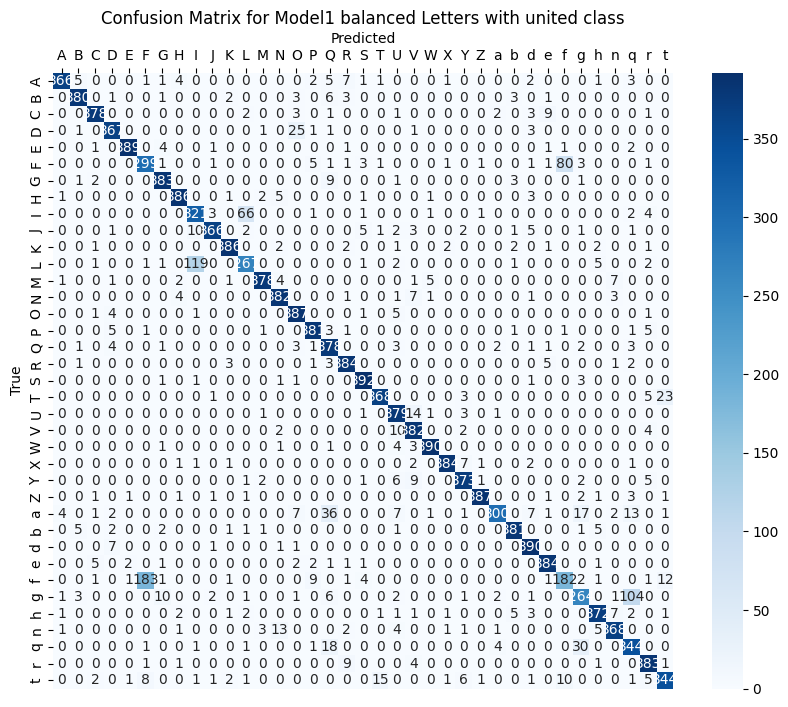

In [ ]:
# Predict labels for the test set
predicted_labels = np.argmax(model.predict(test_images, verbose = 0), axis=1)
# Convert numerical labels to characters
predicted_chars = [mapping[str(label+10)] for label in predicted_labels]
true_chars = [mapping[str(label+10)] for label in test_labels]

conf_matrix = confusion_matrix(true_chars, predicted_chars)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(list(set(predicted_chars))), yticklabels=sorted(list(set(true_chars))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model1 balanced Letters with united class')
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to top
plt.show()

In [ ]:
# path to the 'models' folder in Google Drive
save_dir = '/content/drive/MyDrive/HSLU/CV/Project/saved_models'

os.makedirs(save_dir, exist_ok=True)


# Save the entire model in HDF5 format
model.save(os.path.join(save_dir, 'simple_model.h5'))

f and F, which we dont care about, and again l and I and g and q. How can we improve a bit?

#### More epochs



Epoch 1/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6546 - loss: 1.2184 - val_accuracy: 0.8715 - val_loss: 0.4101
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8888 - loss: 0.3451 - val_accuracy: 0.8928 - val_loss: 0.3385
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9027 - loss: 0.2948 - val_accuracy: 0.9028 - val_loss: 0.3111
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9153 - loss: 0.2503 - val_accuracy: 0.9042 - val_loss: 0.3023
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9215 - loss: 0.2276 - val_accuracy: 0.9068 - val_loss: 0.2953
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9260 - loss: 0.2120 - val_accuracy: 0.9103 - val_loss: 0.2807
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9305 - loss: 0.1953 - val_accuracy: 0.9111 - val_loss: 0.2872
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9333 - loss: 0.1854 

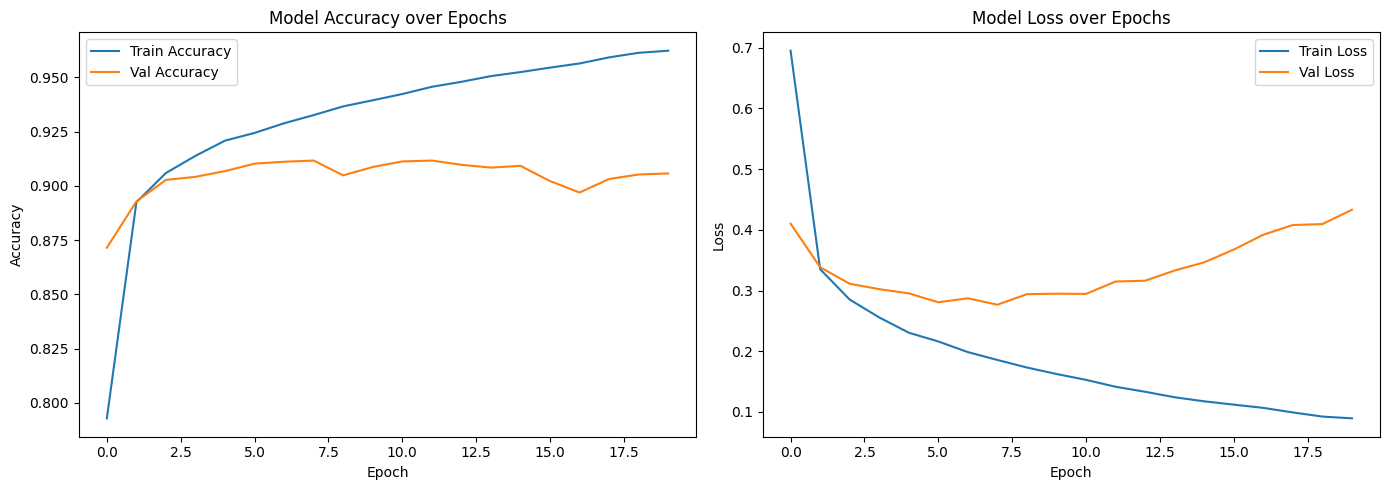

In [ ]:

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 37 distinct letters
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Ok seems that 10(?) would be enough. What about adding learning rate?

#### Learning rate

In [ ]:
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 37 distinct letters
])

# Decrease the learning rate
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3777 - loss: 2.3328 - val_accuracy: 0.7365 - val_loss: 0.9302
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7627 - loss: 0.8148 - val_accuracy: 0.8074 - val_loss: 0.6611
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8257 - loss: 0.5907 - val_accuracy: 0.8311 - val_loss: 0.5695
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8477 - loss: 0.5004 - val_accuracy: 0.8501 - val_loss: 0.5035
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8605 - loss: 0.4512 - val_accuracy: 0.8590 - val_loss: 0.4620
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8745 - loss: 0.4084 - val_accuracy: 0.8675 - val_loss: 0.4303
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8797 - loss: 0.3827 - val_accuracy: 0.8711 - val_loss: 0.4230
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8875 - loss: 0.3634 - 

It did not help too much.

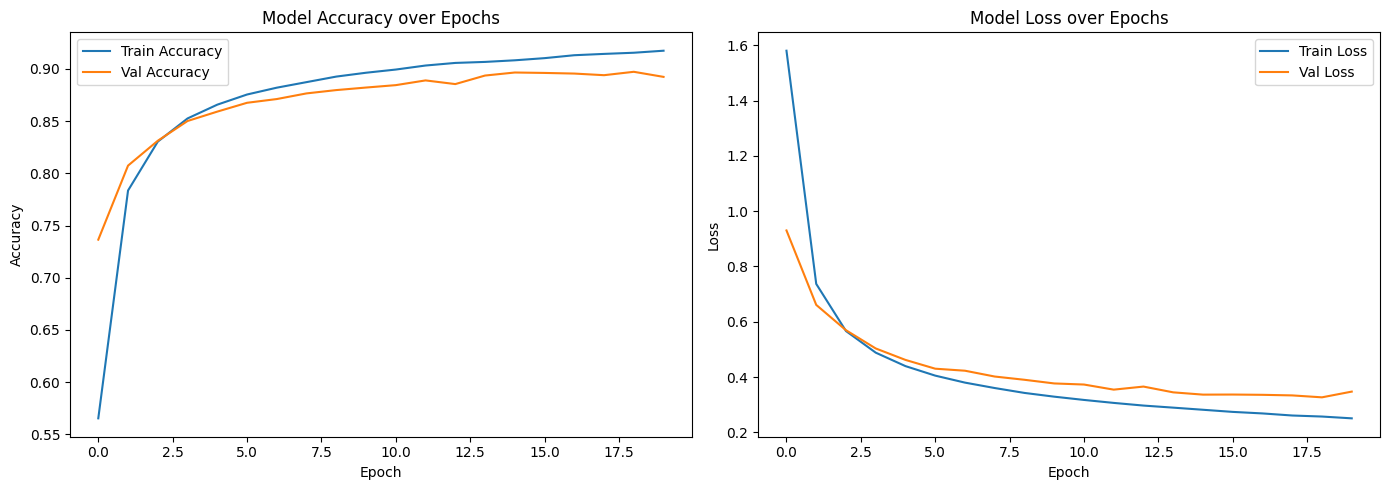

In [ ]:
#todiscuss remove this cell?
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Augmentation of data

In [ ]:
train_images.shape

(88799, 28, 28)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape to add channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# # Convert to float32 and normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(train_images)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 37 distinct letters
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=20,
                    validation_data=(test_images, test_labels))

Train images shape: (88799, 28, 28, 1)
Test images shape: (14799, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5252 - loss: 1.6817 - val_accuracy: 0.8680 - val_loss: 0.4181
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.8307 - loss: 0.5473 - val_accuracy: 0.8908 - val_loss: 0.3536
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8603 - loss: 0.4426 - val_accuracy: 0.8984 - val_loss: 0.3349
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 44s 32ms/step - accuracy: 0.8720 - loss: 0.3997 - val_accuracy: 0.8992 - val_loss: 0.3221
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 71s 24ms/step - accuracy: 0.8819 - loss: 0.3605 - val_accuracy: 0.8974 - val_loss: 0.3273
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.8868 - loss: 0.3450 - val_accuracy: 0.9116 - val_loss: 0.2809
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.8930 - loss: 0.3274 - val_accuracy: 0.9093 - val_loss: 0.2850
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.8948 - loss: 0.31

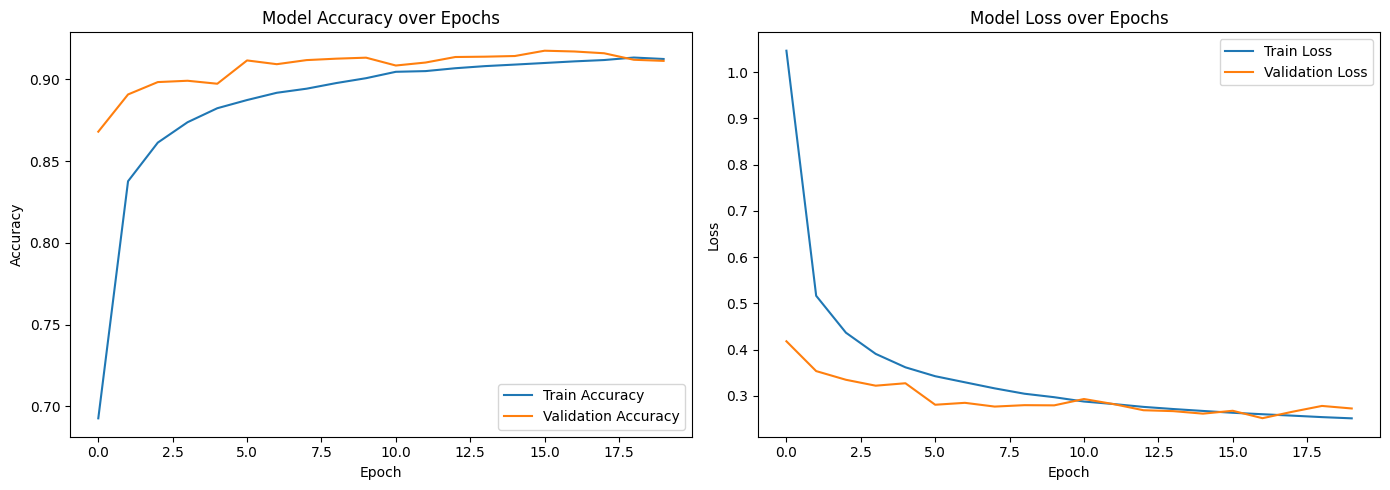

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### Another optimizer

In [ ]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Early stopping



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 37 distinct letters
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Train the model with early stopping
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=20,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6603 - loss: 1.2088 - val_accuracy: 0.8657 - val_loss: 0.4335
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8886 - loss: 0.3409 - val_accuracy: 0.8959 - val_loss: 0.3323
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9081 - loss: 0.2775 - val_accuracy: 0.9058 - val_loss: 0.3009
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9166 - loss: 0.2417 - val_accuracy: 0.9058 - val_loss: 0.2947
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9222 - loss: 0.2223 - val_accuracy: 0.9082 - val_loss: 0.2825
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9288 - loss: 0.2009 - val_accuracy: 0.9113 - val_loss: 0.2806
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9322 - loss: 0.1876 - val_accuracy: 0.9111 - val_loss: 0.2821
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9362 - loss: 0.1744 -

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.8397 - loss: 0.5343 - val_accuracy: 0.9021 - val_loss: 0.3214
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.8841 - loss: 0.3481 - val_accuracy: 0.9093 - val_loss: 0.2980
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8933 - loss: 0.3173 - val_accuracy: 0.9097 - val_loss: 0.2834
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8997 - loss: 0.2966 - val_accuracy: 0.9126 - val_loss: 0.2859
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.9013 - loss: 0.2858 - val_accuracy: 0.9051 - val_loss: 0.3157
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9063 - loss: 0.2758 - val_accuracy: 0.9122 - val_loss: 0.2831
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.9057 - loss: 0.2709 - val_accuracy: 0.9165 - val_loss: 0.2627
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9085 - loss: 0.26

#### More complex model architecture


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(37, activation='softmax')  # Adjust according to num_classes
])

# Compile the updated model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')



Epoch 1/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.5478 - loss: 1.6764 - val_accuracy: 0.8759 - val_loss: 0.4020
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8350 - loss: 0.5296 - val_accuracy: 0.8879 - val_loss: 0.3436
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8546 - loss: 0.4529 - val_accuracy: 0.8976 - val_loss: 0.3157
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8709 - loss: 0.3991 - val_accuracy: 0.9063 - val_loss: 0.2918
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8771 - loss: 0.3798 - val_accuracy: 0.9086 - val_loss: 0.2835
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8855 - loss: 0.3525 - val_accuracy: 0.9100 - val_loss: 0.2819
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8853 - loss: 0.3524 - val_accuracy: 0.9122 - val_loss: 0.2678
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8902 - loss: 0.3352

#### Putting all together (The best choice: Augmentation, Early stopping, complex architecture)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 66s 40ms/step - accuracy: 0.4007 - loss: 2.2807 - val_accuracy: 0.8585 - val_loss: 0.4628
Epoch 2/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 56s 26ms/step - accuracy: 0.7497 - loss: 0.8178 - val_accuracy: 0.8906 - val_loss: 0.3512
Epoch 3/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7944 - loss: 0.6561 - val_accuracy: 0.8980 - val_loss: 0.3172
Epoch 4/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.8151 - loss: 0.5849 - val_accuracy: 0.8924 - val_loss: 0.3494
Epoch 5/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8241 - loss: 0.5562 - val_accuracy: 0.8965 - val_loss: 0.3340
Epoch 6/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8293 - loss: 0.5344 - val_accuracy: 0.9095 - val_loss: 0.2832
Epoch 7/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.8400 - loss: 0.5014 - val_accuracy: 0.9124 - val_loss: 0.2744
Epoch 8/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.8433 - loss: 0.49

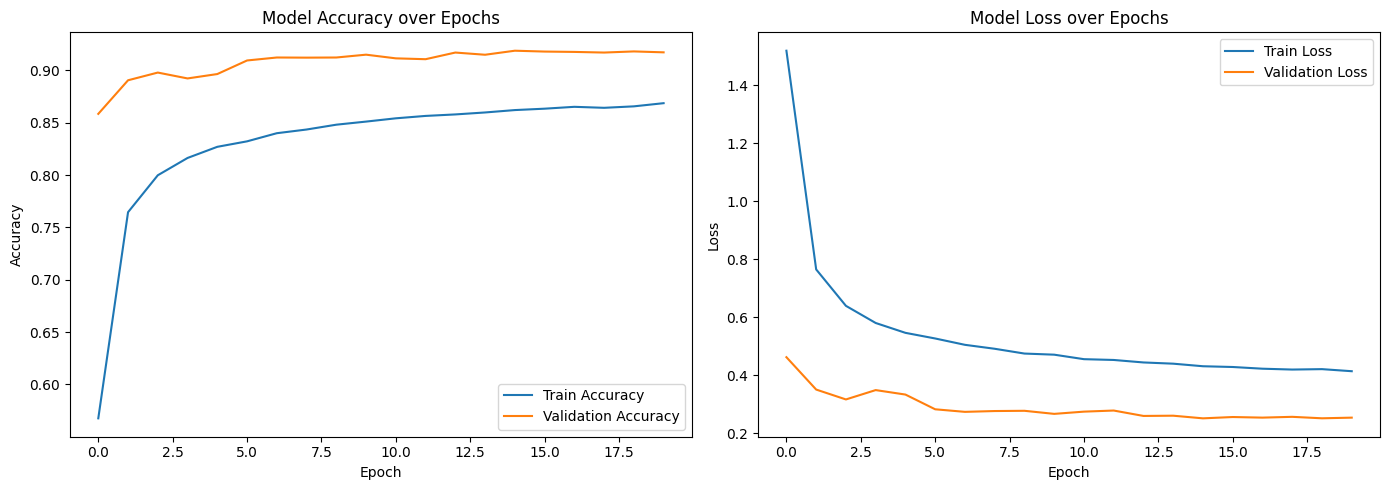

463/463 - 1s - 2ms/step - accuracy: 0.9188 - loss: 0.2520

Test accuracy: 0.9188458919525146
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       400
           1       0.95      0.98      0.96       400
           2       0.97      0.95      0.96       400
           3       0.95      0.93      0.94       400
           4       0.98      0.98      0.98       400
           5       0.70      0.51      0.59       400
           6       0.95      0.97      0.96       400
           7       0.96      0.99      0.97       400
           8       0.70      0.81      0.75       400
           9       0.97      0.94      0.95       400
          10       0.98      0.97      0.97       400
          11       0.79      0.66      0.72       400
          12       0.97      0.98      0.97       400
          13       0.93      0.98      0.96       400
          14       0.95      0.96      0.95       400
 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Normalize
train_images = train_images/ 255.0
test_images = test_images/ 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(train_images)

# Enhanced Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(37, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=30,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Report
from sklearn.metrics import classification_report

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_labels))


Saving model

In [ ]:
# path to the 'models' folder in Google Drive
save_dir = '/content/drive/MyDrive/HSLU/CV/Project/saved_models'

os.makedirs(save_dir, exist_ok=True)


# Save the entire model in HDF5 format
model.save(os.path.join(save_dir, 'complex_model.h5'))


#### Loading model

In [229]:
from tensorflow.keras.models import load_model

save_dir = '/content/drive/MyDrive/HSLU/CV/Project/saved_models'

# loaded_model = load_model(os.path.join(save_dir, 'complex_model.h5'))
loaded_model = load_model(os.path.join(save_dir, 'simple_model.h5'))


In [ ]:
test_images = test_images / 255.0

In [ ]:
print(loaded_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 37)                  │           4,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,439 (962.66 KB)

 Trainable params: 245,733 (959.89 KB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 2 (12.00 B)

None


#### Diving deeper in errors

In [ ]:
#Classification Report
from sklearn.metrics import classification_report

predictions = loaded_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

test_labels_chr = [mapping[str(label+10)] for label in test_labels]
predicted_labels_chr = [mapping[str(label+10)] for label in predicted_labels]

print(classification_report(test_labels_chr, predicted_labels_chr))

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           A       0.96      0.98      0.97       400
           B       0.95      0.98      0.96       400
           C       0.97      0.95      0.96       400
           D       0.95      0.93      0.94       400
           E       0.98      0.98      0.98       400
           F       0.70      0.51      0.59       400
           G       0.95      0.97      0.96       400
           H       0.96      0.99      0.97       400
           I       0.70      0.81      0.75       400
           J       0.97      0.94      0.95       400
           K       0.98      0.97      0.97       400
           L       0.79      0.66      0.72       400
           M       0.97      0.98      0.97       400
           N       0.93      0.98      0.96       400
           O       0.95      0.96      0.95       400
           P       0.97      0.97      0.97       400
           Q       0.92      0.97      0

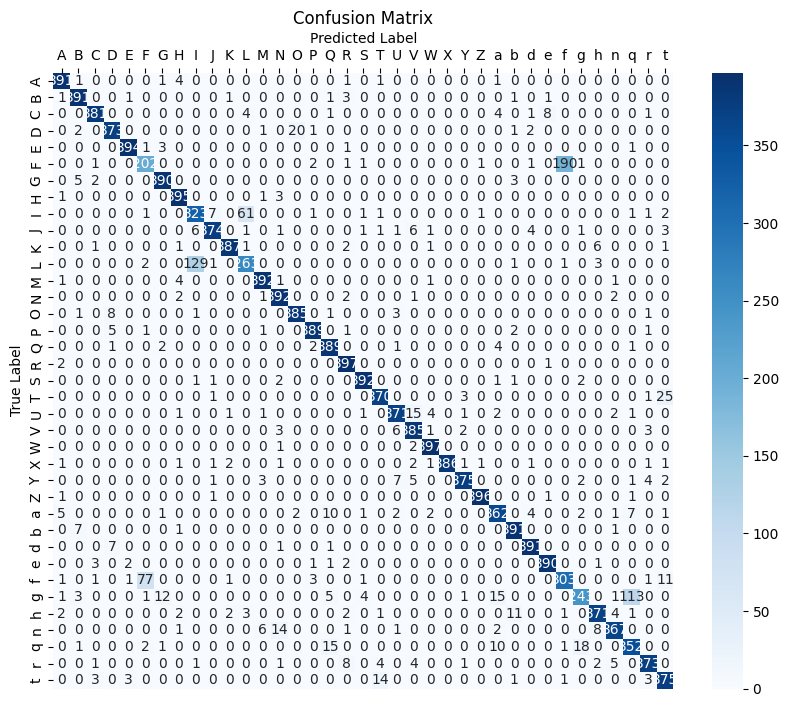

In [ ]:
cm = confusion_matrix(test_labels_chr, predicted_labels_chr)
class_labels = sorted(list(set(test_labels_chr)))  # Unique class labels

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.gca().xaxis.tick_top()  # Move x-axis to top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to top
plt.show()

Misclassified L as I:


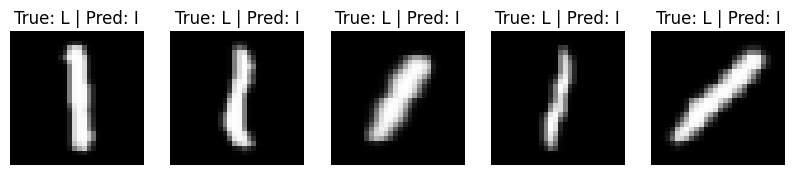

Misclassified g as q:


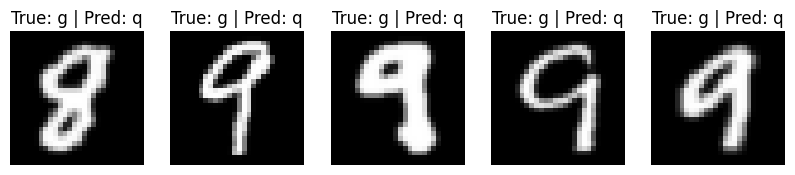

Misclassified D as O:


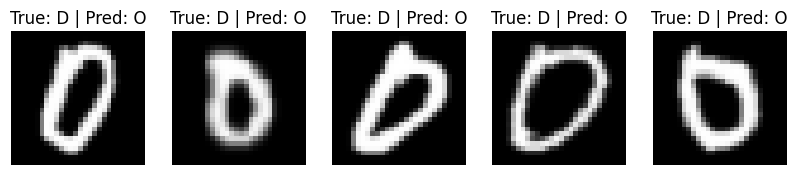

Misclassified Q as a:


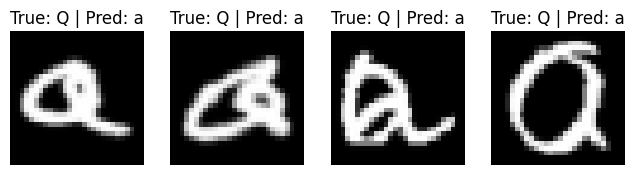

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the pairs of characters you want to visualize misclassifications for
misclassified_pairs = [
    ("L", "I"),
    ("g", "q"),
    ("D", "O"),
    ("Q", "a")
]

# Function to display misclassified images for specific pairs
def display_misclassifications(test_images, test_labels_chr, predicted_labels_chr, pairs, num_samples=5):
    for true_label, predicted_label in pairs:
        # Find indices where the true label is misclassified as the specified predicted label
        misclassified_indices = [
            i for i in range(len(test_labels_chr))
            if test_labels_chr[i] == true_label and predicted_labels_chr[i] == predicted_label
        ]

        # Limit the number of samples to display
        misclassified_indices = misclassified_indices[:num_samples]

        if misclassified_indices:
            print(f"Misclassified {true_label} as {predicted_label}:")
            plt.figure(figsize=(10, 2))
            for i, idx in enumerate(misclassified_indices):
                plt.subplot(1, num_samples, i + 1)
                plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
                plt.title(f"True: {true_label} | Pred: {predicted_label}")
                plt.axis("off")
            plt.show()
        else:
            print(f"No misclassifications found for {true_label} as {predicted_label}.")

# Call the function with your data
display_misclassifications(test_images, test_labels_chr, predicted_labels_chr, misclassified_pairs)


## Testing with own images

In [ ]:
# from google.colab import files
from PIL import Image

img_dir = 'img/letters'  # Adjust this path to your mounted location

# List all image files in the directory
image_files = [f for f in os.listdir(img_dir) if f.endswith(('.png'))]

In [ ]:
image_files

['e.png',
 'g.png',
 'f.png',
 'u.png',
 'z.png',
 'p.png',
 'o.png',
 'q.png',
 'c.png',
 'm.png',
 'v.png',
 'i.png',
 's.png',
 'n.png']

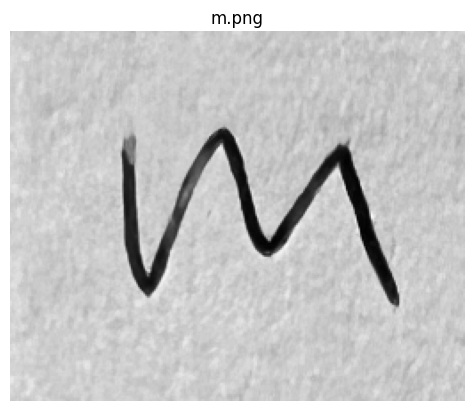

In [ ]:
img_name = 'm.png'

img_path = os.path.join(img_dir, img_name)
img = Image.open(img_path).convert("L")
plt.imshow(img, cmap="gray")
plt.title(img_name)
plt.axis("off")
plt.show()

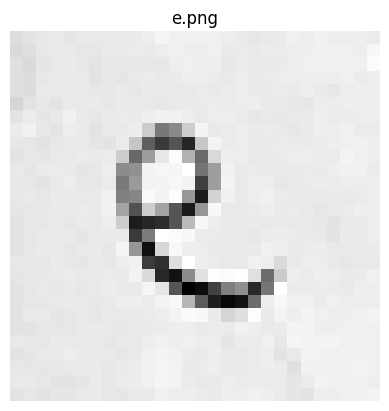

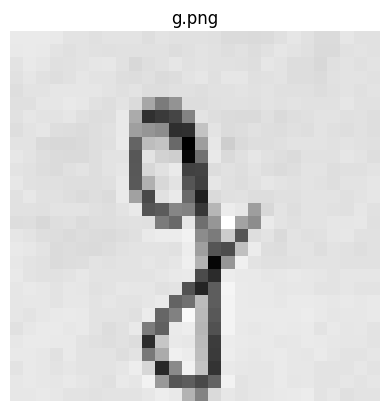

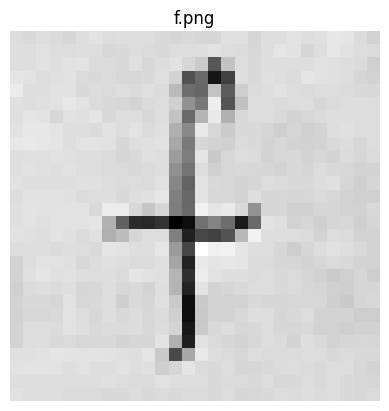

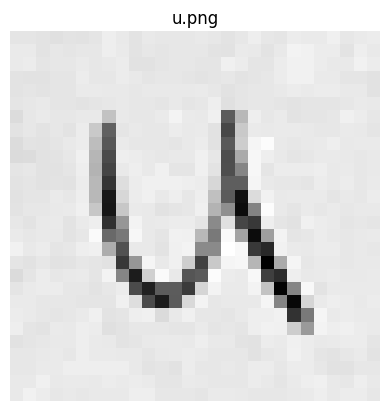

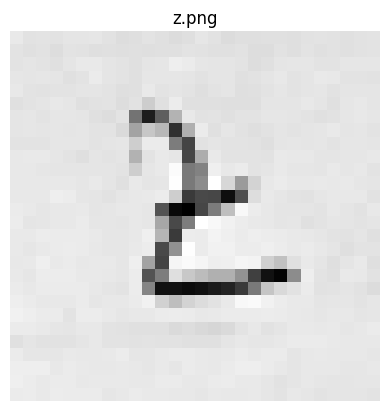

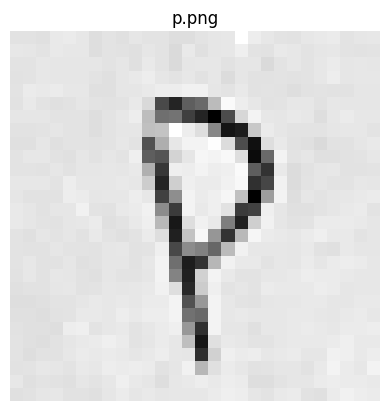

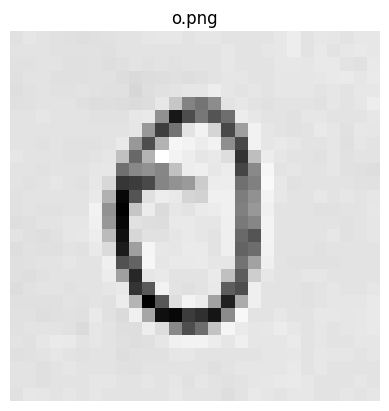

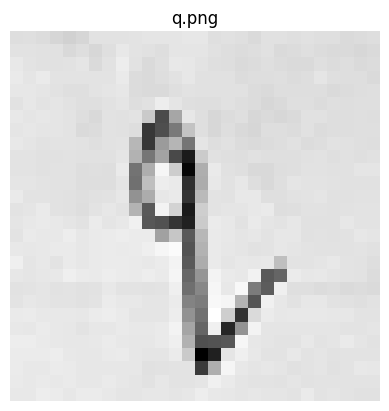

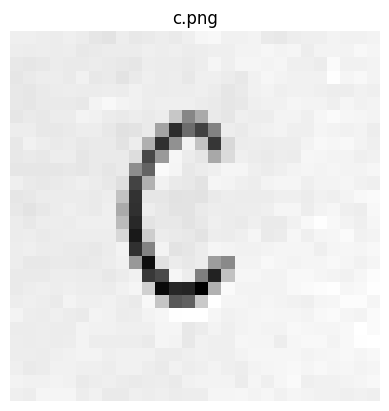

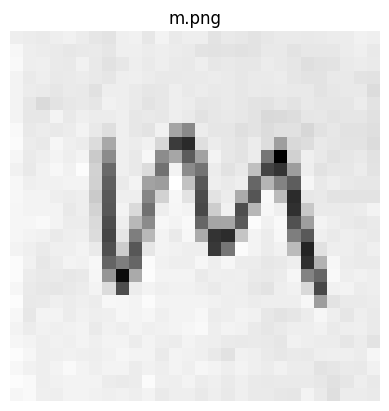

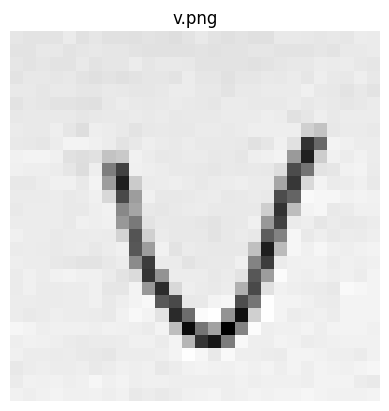

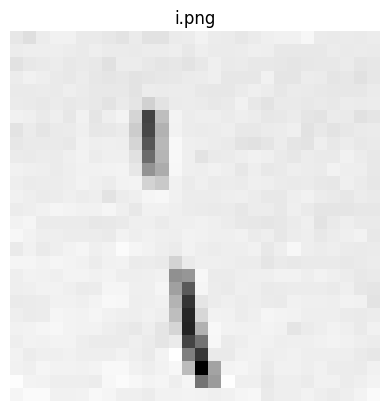

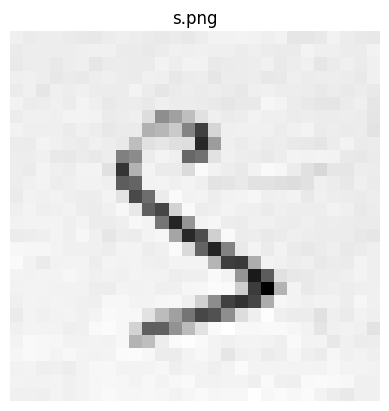

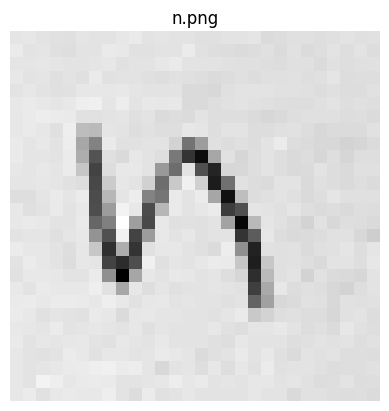

In [ ]:
# Display and resize each image
for img_name in image_files:
    img_path = os.path.join(img_dir, img_name)
    img = Image.open(img_path).convert("L")  # Open image and convert to grayscale
    img_resized = img.resize((28, 28))  # Resize to 28x28

    # Display the resized image
    plt.imshow(img_resized, cmap="gray")
    plt.title(img_name)
    plt.axis("off")
    plt.show()

Array for e.png:
[[191 196 198 199 197 199 199 199 200 200 202 208 204 204 204 204 202 200
  198 199 200 204 202 204 203 203 203 201]
 [188 192 198 199 199 198 198 200 200 201 200 202 204 203 203 205 200 201
  199 201 201 203 203 204 204 204 203 209]
 [193 189 197 199 200 198 195 198 198 198 198 198 203 204 203 203 198 201
  199 199 200 203 204 204 204 204 204 212]
 [192 191 198 199 200 199 196 198 197 199 201 199 200 203 203 201 199 202
  200 201 202 202 202 202 203 204 201 203]
 [192 191 199 199 199 199 197 198 200 198 200 200 199 199 201 199 201 203
  200 200 201 200 203 200 198 202 203 203]
 [186 195 198 196 200 199 200 198 200 199 199 198 199 200 201 202 201 202
  203 200 200 198 198 202 202 203 203 203]
 [195 201 197 199 205 199 197 200 201 200 202 205 204 202 199 202 202 201
  198 199 198 199 200 203 201 201 202 203]
 [201 205 198 196 202 200 196 199 199 202 179 120 132 180 206 199 201 203
  200 201 199 198 200 203 202 204 201 201]
 [198 197 196 198 200 200 197 196 201 175 102  

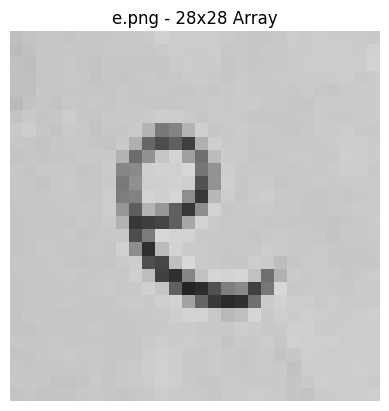

Array for g.png:
[[207 207 207 206 202 202 200 203 202 203 199 203 201 201 201 200 197 197
  196 197 200 204 201 197 197 204 201 201]
 [206 207 206 203 200 202 201 200 201 201 201 201 198 200 202 201 199 201
  198 201 204 203 200 196 196 201 203 201]
 [203 206 204 200 201 202 204 205 201 195 199 201 204 201 202 201 201 200
  199 204 203 198 198 195 200 202 200 202]
 [201 204 201 199 201 204 203 202 199 198 200 197 198 202 204 200 204 204
  200 201 202 198 198 197 201 203 202 201]
 [199 202 203 204 204 204 204 202 200 202 198 198 200 200 199 201 201 202
  201 203 200 200 200 198 200 203 200 202]
 [200 200 204 204 206 205 201 199 202 197 162 133 149 198 198 200 201 201
  200 203 201 203 201 201 201 204 201 201]
 [201 204 203 202 204 200 198 199 206 165  84  90  97 139 203 199 197 196
  196 200 196 199 200 202 202 200 201 199]
 [199 202 204 199 198 197 199 201 206 157 150 145  82  83 181 202 197 198
  201 199 198 200 199 202 200 199 201 199]
 [202 202 196 195 195 196 199 200 207 118 177 1

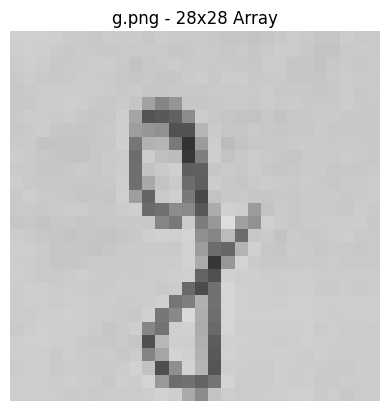

Array for f.png:
[[207 205 208 206 203 208 211 207 208 207 208 205 203 205 203 203 209 209
  203 208 208 211 208 209 213 212 206 201]
 [208 208 210 207 207 208 207 204 205 207 206 205 207 207 208 211 207 206
  204 208 212 210 203 208 213 210 207 206]
 [208 208 210 208 210 211 206 206 205 209 204 207 210 204 196 130 193 207
  205 208 208 208 208 210 209 207 206 200]
 [212 211 208 209 210 206 205 206 204 204 205 209 201 127 141  93 118 208
  205 209 208 206 212 210 209 207 203 201]
 [215 208 208 210 210 205 207 206 208 206 209 206 187 143 139 192 133 198
  206 208 210 207 206 207 207 206 205 205]
 [209 208 209 210 213 210 206 205 204 202 206 207 200 164 149 217 128 191
  207 207 206 207 208 204 206 207 208 207]
 [209 212 211 204 210 209 212 205 208 207 204 207 193 141 184 214 182 205
  207 207 205 202 204 206 208 208 207 207]
 [210 213 213 211 208 208 206 210 207 211 206 209 181 159 214 204 197 205
  205 203 199 203 200 202 207 209 207 207]
 [213 214 213 212 208 211 211 210 204 208 209 2

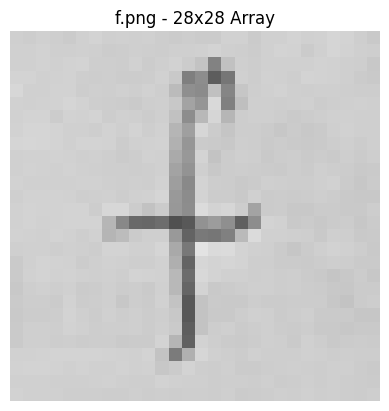

Array for u.png:
[[210 210 209 207 209 208 210 215 212 209 212 211 211 211 212 211 209 211
  215 211 210 214 213 213 216 211 213 214]
 [213 213 209 211 210 211 211 215 213 209 211 210 211 211 211 209 208 213
  212 209 212 218 217 214 214 209 215 212]
 [213 214 210 211 211 213 211 212 214 208 208 210 211 211 210 210 216 214
  210 210 214 217 217 214 212 212 217 214]
 [209 208 208 210 210 214 211 211 214 212 210 211 211 210 209 210 211 209
  210 211 214 217 217 213 213 210 210 208]
 [209 210 209 210 210 213 213 212 212 211 212 212 212 212 213 211 208 210
  211 211 212 214 213 214 214 212 212 208]
 [210 211 212 210 210 209 210 211 212 211 211 210 212 210 211 215 207 210
  211 211 210 209 210 210 210 211 213 212]
 [205 211 213 211 211 212 212 190 212 211 211 213 218 213 212 216 132 184
  215 211 213 209 210 210 211 216 214 211]
 [209 211 209 211 209 214 194 134 210 212 211 211 214 212 213 208 120 194
  213 212 213 213 212 211 211 213 212 210]
 [205 209 208 210 212 214 187 129 213 211 211 2

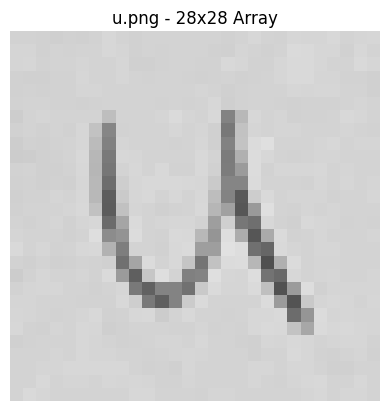

Array for z.png:
[[199 194 195 194 196 196 197 194 191 192 195 193 190 192 197 194 190 192
  192 193 193 192 194 195 194 193 194 195]
 [195 193 194 191 195 194 192 193 192 193 192 193 193 195 194 193 193 194
  191 191 194 192 195 193 194 193 194 195]
 [195 196 195 193 196 199 199 196 195 193 196 197 202 200 197 196 196 195
  191 193 196 197 197 195 195 197 197 197]
 [197 196 197 196 193 195 200 196 195 193 197 197 197 196 194 196 196 193
  194 196 198 195 196 199 198 195 195 194]
 [198 195 194 195 195 196 196 195 192 193 199 195 196 195 192 195 196 192
  193 195 197 195 196 197 194 196 196 196]
 [193 195 196 198 197 193 194 195 191 194 180 193 201 193 193 193 192 192
  192 196 196 196 198 196 193 197 198 196]
 [196 197 195 197 197 196 193 191 195 120  63 107 163 198 194 195 193 195
  195 197 197 196 195 193 194 197 198 197]
 [196 197 196 197 196 197 195 195 189 153 176 166  75 160 200 193 197 194
  192 194 196 195 196 197 199 196 197 195]
 [195 195 195 197 197 197 195 196 197 181 200 2

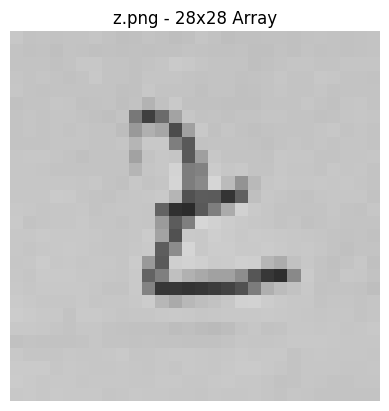

Array for p.png:
[[208 208 207 212 213 211 206 209 207 210 209 209 206 206 209 210 211 224
  214 211 209 208 211 212 213 209 210 211]
 [211 210 209 212 211 211 206 209 208 207 210 209 204 212 207 210 211 215
  209 208 212 211 209 210 211 209 208 209]
 [209 209 211 210 210 210 210 209 210 207 212 209 204 210 211 211 208 210
  210 204 209 211 209 211 213 210 211 210]
 [208 209 211 210 210 210 209 207 210 212 214 210 209 211 208 211 205 210
  208 208 209 208 209 211 214 210 211 211]
 [209 213 212 213 211 211 207 207 210 210 212 214 214 216 216 210 209 212
  208 209 208 206 208 209 208 208 210 210]
 [208 212 209 207 208 210 209 208 209 212 203 126 106 137 143 187 221 214
  211 208 209 211 211 208 211 210 210 210]
 [210 210 210 209 209 209 206 209 211 214 188 146 148 120 106  86 127 202
  217 211 210 212 211 206 211 213 211 211]
 [208 208 209 210 209 209 206 209 210 210 190 192 224 214 206 159  97 102
  194 213 210 209 209 209 210 211 211 209]
 [207 207 210 207 209 209 208 209 211 209 130 1

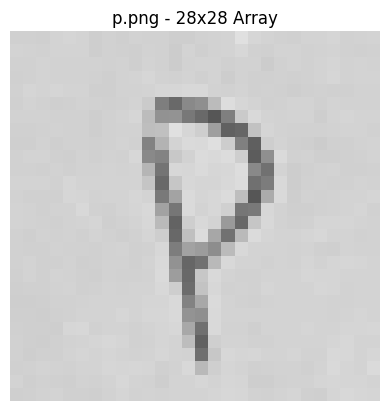

Array for o.png:
[[202 205 204 202 201 200 201 202 204 203 205 206 206 203 205 205 204 203
  204 203 206 210 203 206 205 204 206 206]
 [203 204 204 202 202 202 202 201 204 203 203 204 203 204 204 204 206 203
  204 205 206 210 204 207 204 206 207 206]
 [202 202 203 203 201 201 202 200 201 203 202 203 202 203 203 203 206 204
  204 204 206 206 205 207 207 204 202 207]
 [201 203 203 201 201 201 202 202 199 197 199 200 201 200 201 204 205 205
  204 204 205 205 205 206 207 208 205 208]
 [200 202 204 202 202 203 202 201 201 195 200 202 204 205 205 210 205 203
  205 203 205 205 205 204 205 204 206 206]
 [201 202 204 203 203 201 199 200 199 198 199 206 185 140 130 146 204 206
  203 202 204 204 204 202 205 204 205 210]
 [204 204 205 204 203 203 202 202 202 206 207 149  69 104 132 109 126 209
  206 204 204 202 205 205 204 203 203 206]
 [203 203 203 203 203 204 204 204 203 205 154  94 129 204 213 194 101 158
  213 205 203 202 204 207 205 202 206 205]
 [203 203 202 203 202 202 202 203 207 154 105 1

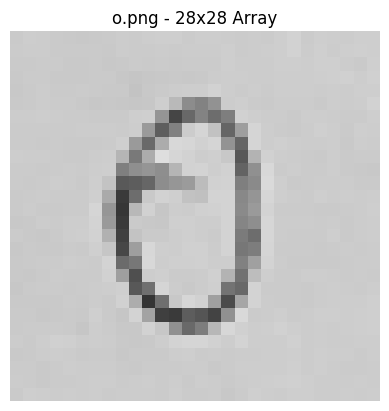

Array for q.png:
[[196 197 195 191 188 191 199 199 199 200 201 201 201 202 202 197 198 197
  194 198 198 197 198 197 197 194 195 196]
 [199 199 198 198 193 196 192 197 203 200 198 196 201 201 201 198 196 195
  196 198 194 195 197 195 194 194 192 194]
 [203 200 198 198 199 201 194 199 206 199 194 197 203 202 200 197 196 194
  195 197 195 194 194 197 195 196 194 195]
 [204 201 204 200 200 200 200 200 204 195 194 196 199 202 198 198 198 195
  196 196 197 195 196 201 197 196 196 194]
 [202 202 201 199 197 197 200 201 202 195 194 194 197 199 198 198 198 198
  195 194 196 196 196 196 194 195 196 197]
 [199 202 200 201 199 197 197 199 201 196 198 206 201 197 196 196 198 196
  195 192 194 197 197 195 197 196 197 197]
 [203 201 202 201 200 196 193 199 198 200 183 101 160 202 197 192 195 197
  192 194 192 194 198 198 196 196 197 196]
 [201 202 201 201 200 194 195 199 198 196  88 103 131 179 197 192 196 193
  191 196 196 195 198 195 196 196 197 197]
 [203 201 199 200 200 199 197 199 200 171  88 1

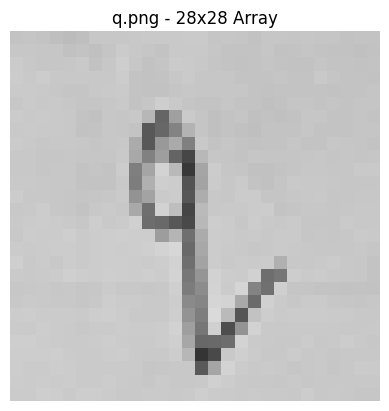

Array for c.png:
[[173 173 172 171 173 171 168 167 172 169 170 172 170 173 177 178 174 174
  175 170 169 172 173 173 175 174 174 175]
 [172 171 172 171 172 169 170 171 171 171 173 172 173 171 172 173 173 175
  175 177 175 176 172 175 175 175 178 176]
 [169 168 169 171 170 170 171 170 169 168 172 171 171 170 172 176 173 176
  176 175 176 173 173 171 179 174 174 175]
 [168 170 172 172 170 174 169 170 167 170 173 171 172 169 173 173 171 169
  174 177 175 174 174 174 181 176 178 175]
 [169 168 170 171 172 171 171 172 171 174 172 171 172 172 173 171 168 170
  174 175 173 174 174 173 172 172 174 173]
 [169 168 170 170 170 169 175 178 175 174 172 173 173 173 171 170 168 169
  173 174 174 176 175 175 173 176 174 175]
 [168 170 169 171 171 175 174 171 170 172 170 172 151 115 135 170 168 173
  172 172 175 175 173 177 179 177 176 175]
 [172 172 169 169 170 172 172 169 165 167 170 131  66 101  77 113 172 170
  173 174 175 173 173 176 175 174 175 172]
 [169 174 172 170 171 169 170 170 167 172 138  

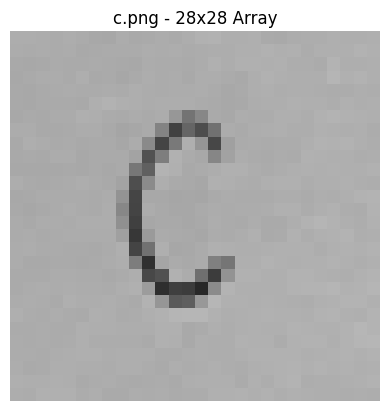

Array for m.png:
[[168 167 166 168 170 167 163 162 169 170 164 171 166 168 168 162 165 164
  162 164 166 166 165 166 167 167 170 169]
 [174 168 167 166 164 165 166 163 169 169 167 168 167 166 162 161 162 160
  162 165 165 162 164 164 164 167 169 165]
 [175 168 169 166 165 170 165 161 164 168 166 168 166 165 168 164 165 164
  164 167 165 163 159 161 162 166 167 166]
 [172 166 168 165 166 167 165 163 168 169 167 165 165 166 166 167 166 164
  166 166 167 163 162 162 165 165 162 161]
 [172 167 166 163 166 165 160 168 168 166 163 164 168 165 167 165 166 164
  166 165 166 165 165 162 164 165 165 157]
 [172 164 156 162 164 165 163 170 168 166 162 164 168 167 163 164 166 164
  162 161 164 162 165 163 163 163 167 162]
 [172 164 164 171 165 169 167 167 169 164 165 164 168 166 161 164 165 164
  162 155 156 158 163 164 162 163 163 160]
 [175 165 167 165 167 171 165 159 169 164 162 170 123 106 167 163 163 159
  162 157 160 160 154 161 164 161 161 159]
 [176 167 165 173 169 167 157 125 169 167 170 1

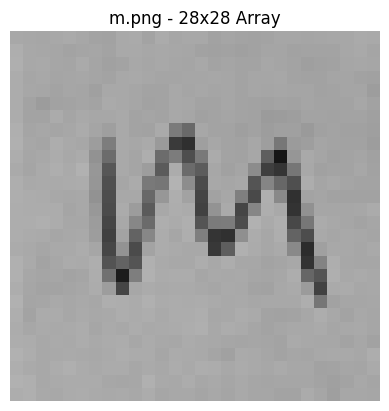

Array for v.png:
[[174 172 173 173 177 171 174 171 171 170 172 171 169 172 176 173 170 172
  170 170 176 176 175 174 175 174 178 177]
 [173 173 175 175 173 174 175 174 174 172 171 171 171 171 172 171 173 172
  174 174 173 172 173 174 173 176 176 177]
 [174 173 174 172 172 176 173 174 174 178 174 176 176 175 173 172 172 173
  171 172 174 175 175 178 177 178 175 174]
 [173 175 175 174 175 173 170 172 170 172 174 174 173 178 174 174 171 174
  174 176 175 177 174 179 176 175 179 175]
 [176 176 174 176 176 174 174 176 175 174 174 175 178 178 175 175 173 176
  176 177 177 177 180 176 175 172 175 173]
 [173 175 174 173 173 171 170 175 178 176 175 176 177 176 175 174 177 177
  176 176 176 178 175 177 176 174 175 177]
 [175 176 176 176 176 174 175 176 176 177 176 177 175 176 176 176 177 177
  177 179 178 171 174 179 176 178 178 178]
 [177 176 176 179 174 169 179 178 176 172 175 176 175 175 177 177 176 177
  179 179 179 179 160 152 175 177 177 176]
 [176 175 174 178 183 183 180 178 173 175 179 1

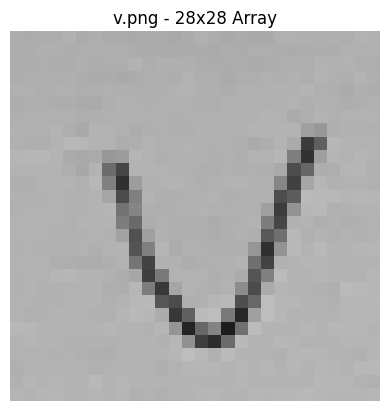

Array for i.png:
[[173 168 177 180 180 175 175 173 171 176 170 170 176 177 181 177 176 173
  176 179 180 180 184 176 175 176 175 177]
 [177 178 178 178 177 175 178 176 176 175 177 177 178 174 178 176 176 177
  179 178 174 174 174 174 177 175 176 175]
 [170 174 175 177 174 175 174 169 177 177 174 172 173 171 174 179 175 176
  174 174 173 172 173 174 174 176 172 173]
 [177 180 178 175 174 177 173 172 173 171 172 173 174 176 177 179 173 173
  173 180 172 172 177 176 172 173 169 173]
 [175 175 176 175 178 176 174 174 174 171 177 176 177 177 174 173 173 176
  179 177 173 176 175 174 173 173 173 176]
 [176 175 174 176 174 175 174 171 175 172 158 171 176 177 176 174 175 180
  174 171 175 175 174 175 174 177 176 177]
 [180 179 175 178 173 180 172 178 182 161  61 145 182 177 178 178 176 178
  177 173 174 176 172 171 176 175 169 172]
 [171 176 172 175 176 179 173 174 176 155  64 137 181 177 176 177 178 174
  174 176 177 179 170 174 171 173 175 176]
 [173 175 175 175 174 180 178 179 178 161  74 1

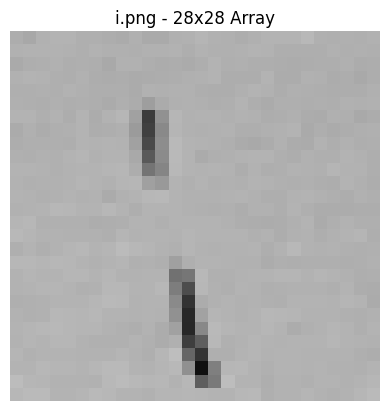

Array for s.png:
[[177 173 175 175 173 172 171 174 176 175 173 172 173 171 175 178 178 179
  178 176 178 170 170 172 178 174 172 171]
 [173 175 175 175 175 176 177 177 173 173 172 174 177 176 177 176 176 174
  176 174 173 173 180 176 176 174 174 178]
 [172 175 175 172 175 176 170 173 174 173 173 178 175 178 178 172 173 174
  175 177 172 175 177 170 173 176 173 177]
 [176 177 175 171 173 172 175 176 174 173 177 176 171 174 175 170 174 174
  175 171 172 176 174 175 175 174 172 177]
 [173 177 170 176 175 177 174 174 174 179 174 170 173 175 173 175 173 171
  176 177 175 175 174 172 174 172 174 172]
 [178 174 175 177 174 179 176 172 174 174 172 176 174 174 173 172 170 172
  172 181 179 174 172 170 169 173 176 170]
 [174 177 177 176 180 179 178 173 175 176 163 107 120 141 166 176 173 175
  178 176 176 174 175 174 174 175 174 169]
 [178 176 176 176 173 177 175 171 173 173 132 136 150  99  51 158 176 177
  177 177 174 177 179 173 175 173 174 168]
 [174 174 179 177 175 173 177 175 172 141 166 1

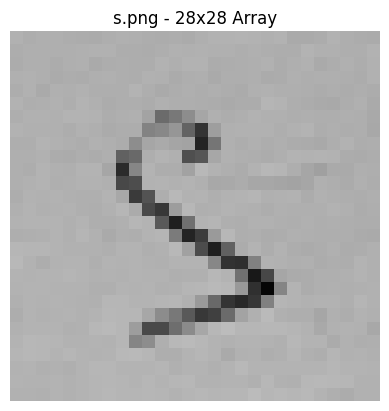

Array for n.png:
[[163 164 162 160 159 163 161 162 164 166 162 163 161 162 159 159 161 162
  163 156 157 159 159 158 159 161 159 160]
 [167 162 163 159 158 162 161 166 165 160 160 162 162 167 160 158 157 156
  157 159 156 160 156 158 161 158 161 157]
 [163 163 164 163 161 162 163 164 160 162 162 164 166 162 161 161 160 159
  159 158 157 159 159 156 160 158 159 160]
 [165 162 163 159 161 159 166 160 162 162 159 158 160 159 158 156 157 159
  157 159 159 160 158 159 163 157 158 158]
 [161 164 162 159 160 164 164 164 165 163 161 162 162 155 155 154 159 161
  161 161 160 160 159 157 159 157 157 160]
 [165 166 165 163 165 169 170 163 168 162 165 164 165 155 155 158 160 161
  160 159 158 157 157 159 161 158 159 158]
 [164 166 168 167 166 160 160 161 163 159 161 156 157 156 161 158 158 158
  156 153 155 158 159 159 159 157 158 156]
 [164 166 164 159 169 135 133 163 161 158 160 158 158 164 163 158 161 161
  157 157 159 160 157 154 156 156 156 160]
 [166 163 165 162 168 120  94 166 160 160 162 1

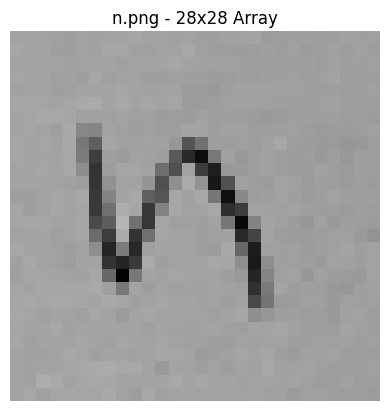

In [ ]:
# Process each image
for img_name in image_files:
    img_path = os.path.join(img_dir, img_name)

    # Open the original image and convert to grayscale
    img = Image.open(img_path).convert("L")  # "L" mode converts to grayscale

    # Resize the image to 28x28
    img_resized = img.resize((28, 28))

    # Convert the resized image to a NumPy array with pixel values in the range 0-255
    img_array = np.array(img_resized, dtype=np.uint8)

    # Display the array and the image for reference
    print(f"Array for {img_name}:")
    print(img_array)  # Print the array values

    plt.imshow(img_array, cmap="gray", vmin=0, vmax=255)
    plt.title(f"{img_name} - 28x28 Array")
    plt.axis("off")
    plt.show()

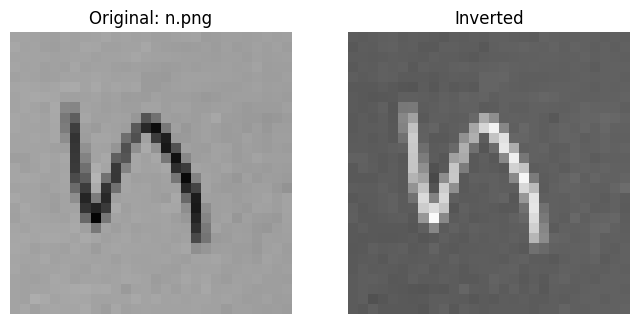

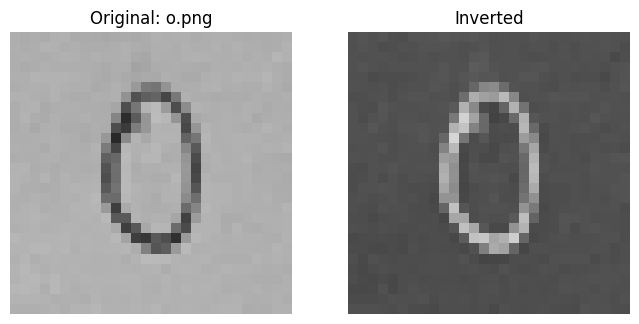

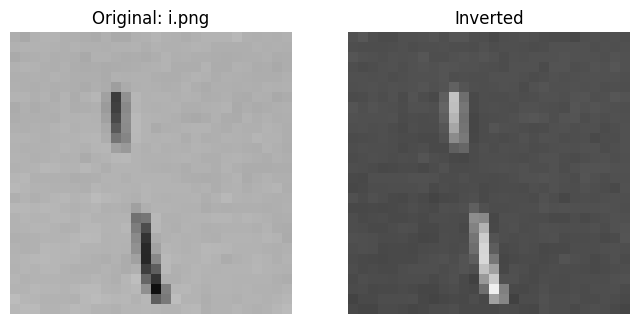

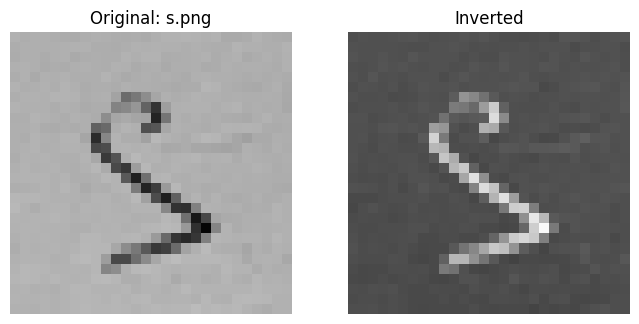

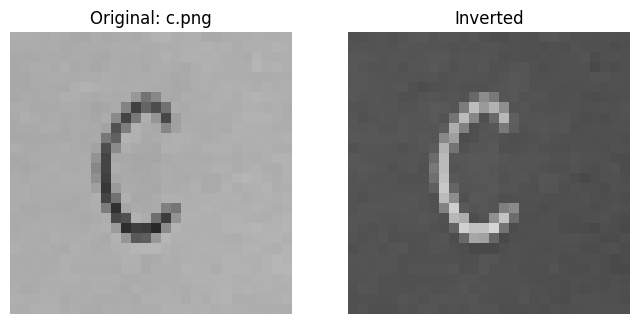

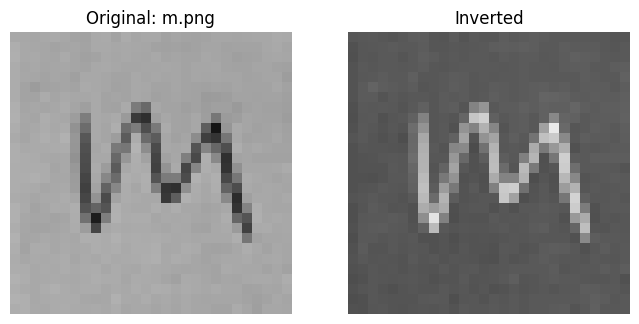

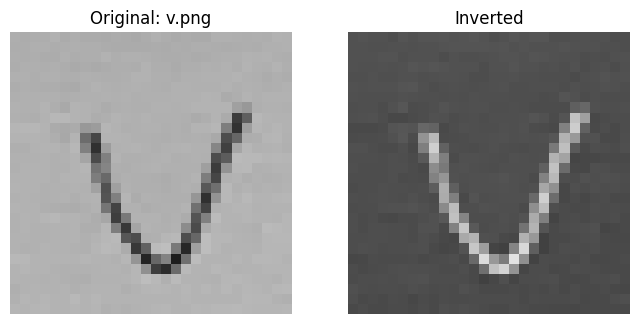

In [ ]:
# Process each image
for img_name in image_files:
    img_path = os.path.join(img_dir, img_name)

    # Open the original image and convert to grayscale
    img = Image.open(img_path).convert("L")  # "L" mode converts to grayscale

    # Resize the image to 28x28
    img_resized = img.resize((28, 28))

    # Convert the resized image to a NumPy array with pixel values in the range 0-255
    img_array = np.array(img_resized, dtype=np.uint8)

    # Invert the image (make white as black and black as white)
    img_inverted = 255 - img_array

    # Display the original and inverted images
    plt.figure(figsize=(8, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap="gray", vmin=0, vmax=255)
    plt.title(f"Original: {img_name}")
    plt.axis("off")

    # Inverted image
    plt.subplot(1, 2, 2)
    plt.imshow(img_inverted, cmap="gray", vmin=0, vmax=255)
    plt.title("Inverted")
    plt.axis("off")

    plt.show()

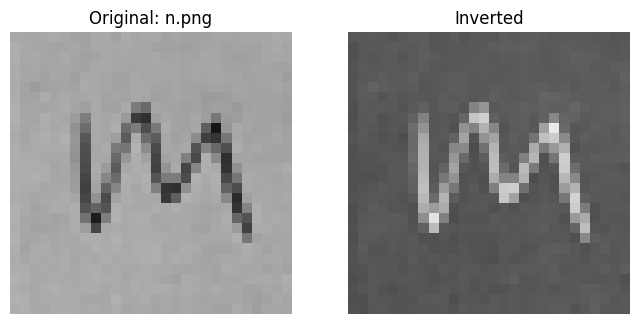

In [ ]:
# Define the path to the img directory and image file
img_dir = 'img/letters'  # Adjust this path if necessary
img_path = os.path.join(img_dir, 'm.png')  # Path to n.png

# Open the image and convert to grayscale
img = Image.open(img_path).convert("L")  # "L" mode converts to grayscale

# Resize the image to 28x28
img_resized = img.resize((28, 28))

# Convert the resized image to a NumPy array with pixel values in the range 0-255
img_array = np.array(img_resized, dtype=np.uint8)

# Invert the image (make white as black and black as white)
o_array = 255 - img_array

# Display the original and inverted images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap="gray", vmin=0, vmax=255)
plt.title("Original: n.png")
plt.axis("off")

# Inverted image
plt.subplot(1, 2, 2)
plt.imshow(o_array, cmap="gray", vmin=0, vmax=255)
plt.title("Inverted")
plt.axis("off")

plt.show()

In [ ]:
o_array

array([[ 53,  50,  51,  53,  54,  55,  54,  53,  51,  52,  50,  49,  49,
         52,  50,  50,  51,  52,  51,  52,  49,  45,  52,  49,  50,  51,
         49,  49],
       [ 52,  51,  51,  53,  53,  53,  53,  54,  51,  52,  52,  51,  52,
         51,  51,  51,  49,  52,  51,  50,  49,  45,  51,  48,  51,  49,
         48,  49],
       [ 53,  53,  52,  52,  54,  54,  53,  55,  54,  52,  53,  52,  53,
         52,  52,  52,  49,  51,  51,  51,  49,  49,  50,  48,  48,  51,
         53,  48],
       [ 54,  52,  52,  54,  54,  54,  53,  53,  56,  58,  56,  55,  54,
         55,  54,  51,  50,  50,  51,  51,  50,  50,  50,  49,  48,  47,
         50,  47],
       [ 55,  53,  51,  53,  53,  52,  53,  54,  54,  60,  55,  53,  51,
         50,  50,  45,  50,  52,  50,  52,  50,  50,  50,  51,  50,  51,
         49,  49],
       [ 54,  53,  51,  52,  52,  54,  56,  55,  56,  57,  56,  49,  70,
        115, 125, 109,  51,  49,  52,  53,  51,  51,  51,  53,  50,  51,
         50,  45],
       [ 51,  51,  50,  51,  52,  52,  53,  53,  53,  49,  48, 106, 186,
        151, 123, 146, 129,  46,  49,  51,  51,  53,  50,  50,  51,  52,
         52,  49],
       [ 52,  52,  52,  52,  52,  51,  51,  51,  52,  50, 101, 161, 126,
         51,  42,  61, 154,  97,  42,  50,  52,  53,  51,  48,  50,  53,
         49,  50],
       [ 52,  52,  53,  52,  53,  53,  53,  52,  48, 101, 150,  83,  39,
         41,  46,  42, 107, 154,  42,  50,  48,  50,  51,  51,  50,  54,
         50,  51],
       [ 50,  51,  51,  52,  53,  53,  51,  50,  74, 133,  83,  33,  41,
         45,  50,  48,  55, 168,  76,  46,  50,  51,  52,  53,  50,  53,
         52,  52],
       [ 52,  52,  53,  52,  51,  52,  50,  49, 128, 112, 106, 113,  74,
         45,  44,  49,  46, 156, 111,  39,  52,  50,  52,  52,  50,  53,
         54,  55],
       [ 52,  53,  52,  50,  51,  53,  49,  59, 166, 162, 153, 114, 105,
        100,  67,  46,  45, 128, 117,  37,  49,  53,  52,  51,  51,  51,
         53,  53],
       [ 53,  52,  51,  52,  52,  52,  48,  85, 197, 146,  54,  45,  48,
         61,  63,  43,  43, 119, 106,  41,  49,  51,  52,  49,  51,  50,
         51,  50],
       [ 53,  51,  53,  53,  52,  52,  42, 105, 201,  71,  46,  57,  50,
         51,  47,  46,  43, 117, 101,  43,  52,  52,  52,  53,  53,  52,
         51,  49],
       [ 55,  54,  51,  52,  50,  50,  43, 101, 197,  53,  55,  56,  48,
         48,  50,  50,  44, 122, 113,  41,  51,  51,  51,  52,  51,  53,
         51,  50],
       [ 52,  54,  55,  53,  50,  49,  45,  78, 191,  60,  53,  53,  50,
         48,  50,  52,  44, 132, 146,  41,  51,  52,  52,  52,  49,  53,
         51,  50],
       [ 55,  53,  54,  54,  52,  53,  48,  57, 184,  97,  40,  49,  50,
         47,  47,  51,  44, 136, 130,  42,  52,  52,  52,  53,  52,  51,
         52,  51],
       [ 54,  53,  52,  52,  50,  51,  52,  44, 148, 136,  39,  50,  48,
         48,  47,  50,  50, 126,  95,  44,  51,  53,  53,  53,  53,  52,
         51,  51],
       [ 54,  55,  53,  51,  52,  52,  52,  46,  96, 176,  50,  48,  52,
         52,  51,  47,  75, 141,  66,  49,  52,  52,  50,  50,  51,  52,
         51,  52],
       [ 56,  53,  52,  52,  53,  52,  51,  50,  48, 167, 143,  42,  51,
         54,  51,  48, 140, 151,  44,  52,  52,  52,  53,  51,  50,  51,
         52,  50],
       [ 54,  54,  54,  54,  52,  53,  51,  53,  46,  82, 202, 144,  55,
         41,  46,  95, 180,  89,  44,  51,  52,  52,  53,  51,  50,  50,
         50,  48],
       [ 53,  53,  55,  54,  53,  54,  48,  53,  57,  43,  92, 192, 197,
        162, 170, 188, 110,  38,  52,  51,  49,  52,  51,  49,  49,  50,
         49,  48],
       [ 53,  52,  52,  52,  53,  57,  50,  52,  55,  55,  45,  56, 111,
        150, 130,  72,  40,  47,  50,  49,  46,  49,  51,  50,  51,  50,
         49,  48],
       [ 51,  53,  50,  47,  48,  51,  50,  51,  54,  55,  54,  50,  43,
         42,  42,  46,  50,  44,  50,  50,  50,  47,  51,  50,  51,  51,
         50,  50],
       [ 54,  53,  51,  50,  51,  53,  5

In [ ]:
type(n_array)
# test_images[0].shape

numpy.ndarray

In [ ]:
predictions_s = loaded_model.predict(o_array.reshape(1, 28, 28))
predicted_labels = np.argmax(predictions_s, axis=1)


predicted_labels_chr = [mapping[str(label+10)] for label in predicted_labels]

predicted_labels_chr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


['B']

In [ ]:
predictions_o = loaded_model.predict(o_array.reshape(1, 28, 28))
predicted_labels = np.argmax(predictions_o, axis=1)


predicted_labels_chr = [mapping[str(label+10)] for label in predicted_labels]

predicted_labels_chr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


['O']

In [ ]:
test_images.shape

(14799, 28, 28)

### Paper

In [ ]:

from PIL import Image, ImageOps
import cv2

img_dir = 'img/letters'

In [ ]:
all_files = os.listdir(img_dir)

In [ ]:
print(f"Total images found: {len(all_files)}")

print("Files:", all_files)

Total images found: 14
Files: ['e.png', 'g.png', 'f.png', 'u.png', 'z.png', 'p.png', 'o.png', 'q.png', 'c.png', 'm.png', 'v.png', 'i.png', 's.png', 'n.png']


In [ ]:
def preprocess_image(image_path, threshold=80):
    """
    Preprocesses the image for prediction.

    Steps:
    - Load the image.
    - Convert to grayscale.
    - Resize to 28x28 pixels.
    - Invert colors (white to black).
    - Apply thresholding to reduce gray shades to pure black or white.
    - Normalize pixel values to [0, 1].
    - Reshape to (28, 28).

    Args:
    - image_path (str): Path to the image file.
    - threshold (int): Threshold value for binarization.

    Returns:
    - original_img (PIL.Image.Image): Original grayscale image.
    - processed_img (np.ndarray): Preprocessed image array with shape (28, 28).
    """
    try:
        # Load the image
        img = Image.open(image_path)

        # Convert to grayscale
        img_gray = img.convert('L')  # 'L' mode is (8-bit pixels, black and white)

        # Resize to 28x28 pixels
        img_resized = img_gray.resize((28, 28), Image.LANCZOS)

        # Invert colors (white to black)
        img_inverted = ImageOps.invert(img_resized)

        # Convert to NumPy array
        img_array = np.array(img_inverted)

        # Apply thresholding to binarize the image
        _, img_thresh = cv2.threshold(img_array, threshold, 255, cv2.THRESH_BINARY)

        # Normalize pixel values to [0, 1]
        img_normalized = img_thresh.astype('float32') / 255.0

        # Reshape to (28, 28)
        img_ready = img_normalized.reshape(28, 28)

        return img_resized, img_ready
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None


In [ ]:
# Initialize lists to hold original and processed images, along with labels
original_images = []
processed_images = []
true_labels = []

for filename in all_files:
    file_path = os.path.join(img_dir, filename)

    # Preprocess the image
    original_img, processed_img = preprocess_image(file_path, 100)

    if processed_img is not None:
        # Append to lists
        original_images.append(original_img)
        processed_images.append(processed_img)

        # Extract the true label from the filename (single letter, case-insensitive)
        label = filename[0].upper()
        true_labels.append(label)

print(f"Total processed images: {len(processed_images)}")


Total processed images: 14


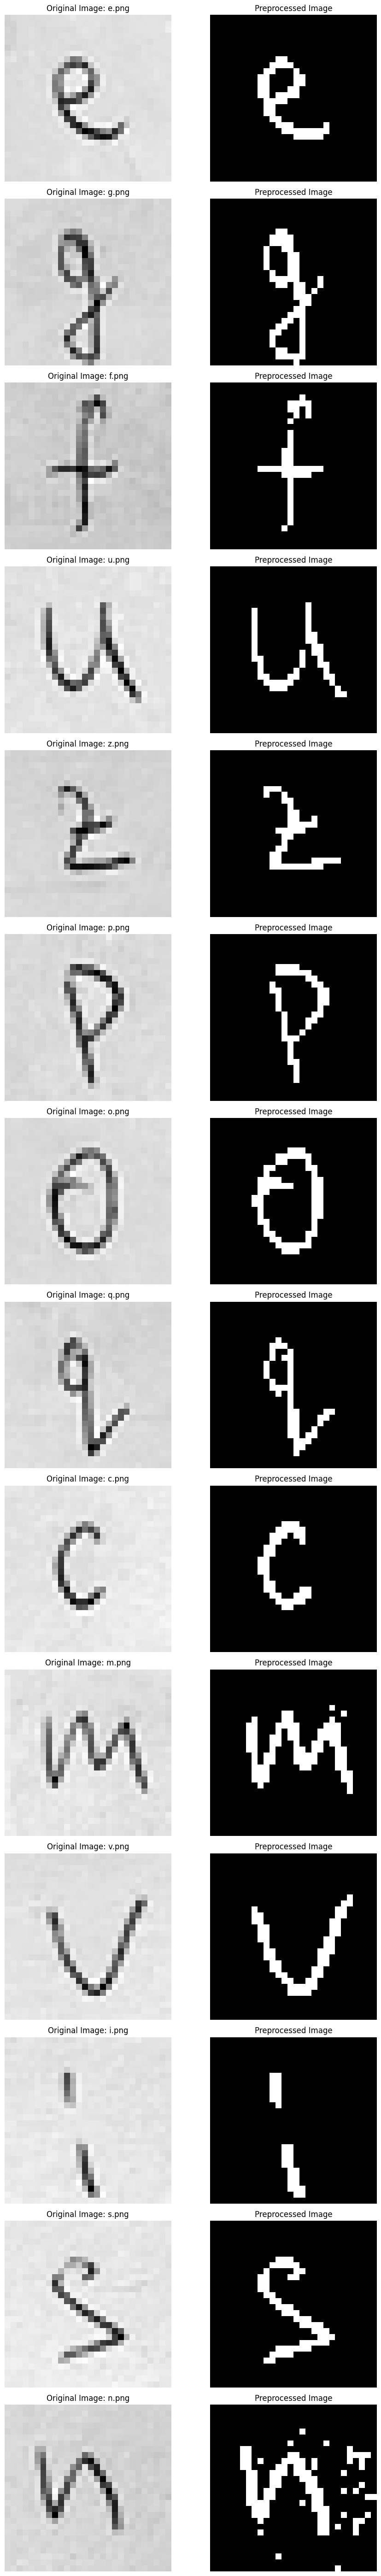

In [ ]:
# Number of images to display
num_display = min(14, len(original_images))  # Adjust as needed

plt.figure(figsize=(10, 4 * num_display))

for i in range(num_display):
    # Original Image
    plt.subplot(num_display, 2, 2*i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f"Original Image: {all_files[i]}")
    plt.axis('off')

    # Preprocessed Image
    plt.subplot(num_display, 2, 2*i + 2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
processed_images[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0., 0., 0., 0

In [ ]:
1# Convert the list of processed images into a NumPy array
# processed_images = np.array(processed_images) / 255.0
processed_array = np.array(processed_images)

print(f"Shape of processed array: {processed_array.shape}")  # Should be (num_letters, 28, 28)

Shape of processed array: (14, 28, 28)


In [ ]:
processed_array[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        0., 0., 0., 0., 0

In [ ]:
true_labels

['E', 'G', 'F', 'U', 'Z', 'P', 'O', 'Q', 'C', 'M', 'V', 'I', 'S', 'N']

In [ ]:
# Make predictions
predictions = loaded_model.predict(processed_array)

# Convert predictions to class indices
predicted_indices = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
predicted_letters = [mapping.get(str(label + 10), 'Unknown') for label in predicted_indices]

In [ ]:
predicted_letters

['e', 'q', 'F', 'W', 'E', 'P', 'B', 'q', 'G', 'M', 'V', 'J', 'S', 'M']

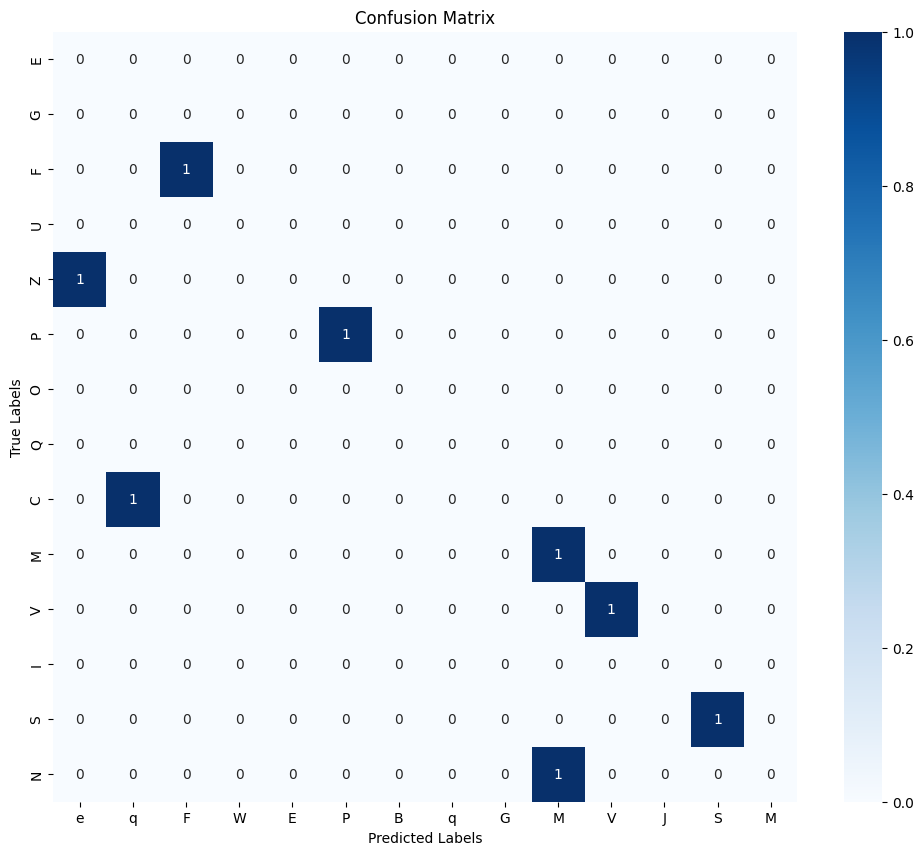

In [ ]:
# conf matrix

class_names = true_labels

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_letters, labels=class_names)

# Convert the confusion matrix to a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=class_names, columns=predicted_letters)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Create a dictionary to map indices to letters
index_to_label = {idx: label for idx, label in enumerate(class_names)}

# Map predicted indices to letters
predicted_letters = [index_to_label.get(idx, 'Unknown') for idx in predicted_indices]

# True labels are already extracted from filenames
true_letters = true_labels

print("Sample Predicted Letters:", predicted_letters[:5])
print("Sample True Letters:", true_letters[:5])


Sample Predicted Letters: ['Unknown', 'Unknown', 'P', 'Unknown', 'Z']
Sample True Letters: ['E', 'G', 'F', 'U', 'Z']


#### Uploading Picture

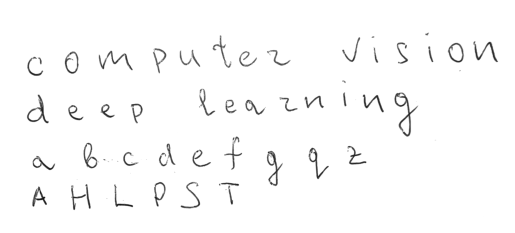

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'img/all_hr_crop.JPG'
image = Image.open(image_path)

# Convert to grayscale
gray_image = image.convert('L')  # 'L' mode is for grayscale
gray_array = np.array(gray_image)

# Adjust background to white (set a threshold)
threshold = 155  # Adjust this value as needed
gray_array[gray_array > threshold] = 255

# Convert back to an image and display it
processed_image = Image.fromarray(gray_array)
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()


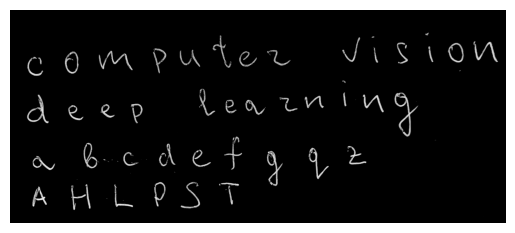

In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'img/all_hr_crop.JPG'
image = Image.open(image_path)

# Convert to grayscale
gray_image = image.convert('L')  # 'L' mode is for grayscale
gray_array = np.array(gray_image)

# Adjust background to white (set a threshold)
white_threshold = 155  # Adjust this value as needed for making background white
gray_array[gray_array > white_threshold] = 255

# Save the image with white background
processed_image = Image.fromarray(gray_array)
processed_image.save('img/image_with_white_background.png')

# Convert white background to black by inverting the grayscale values
inverted_array = 255 - gray_array  # Invert grayscale values
black_threshold = 100  # Set pixels above this to black
inverted_array[inverted_array < black_threshold] = 0  # Make background black

# Save and display the black background version
black_background_image = Image.fromarray(inverted_array)
black_background_image.save('img/image_with_black_background.png')

# Display the final image with black background
plt.imshow(black_background_image, cmap='gray')
plt.axis('off')
plt.show()


### iPad



#### Comlex model

In [ ]:
original_images = 0
processed_images = 0
true_labels = 0

Total images found: 10
Files: ['etc', 'w.png', 's.png', 'e.png', 'h.png', 'r.png', 'l.png', 'u.png', 'i.png', 'o.png']
Error processing img/letters/ipad/letters/etc: [Errno 21] Is a directory: '/content/drive/MyDrive/HSLU/CV/Project/img/letters/ipad/letters/etc'
Total processed images: 9


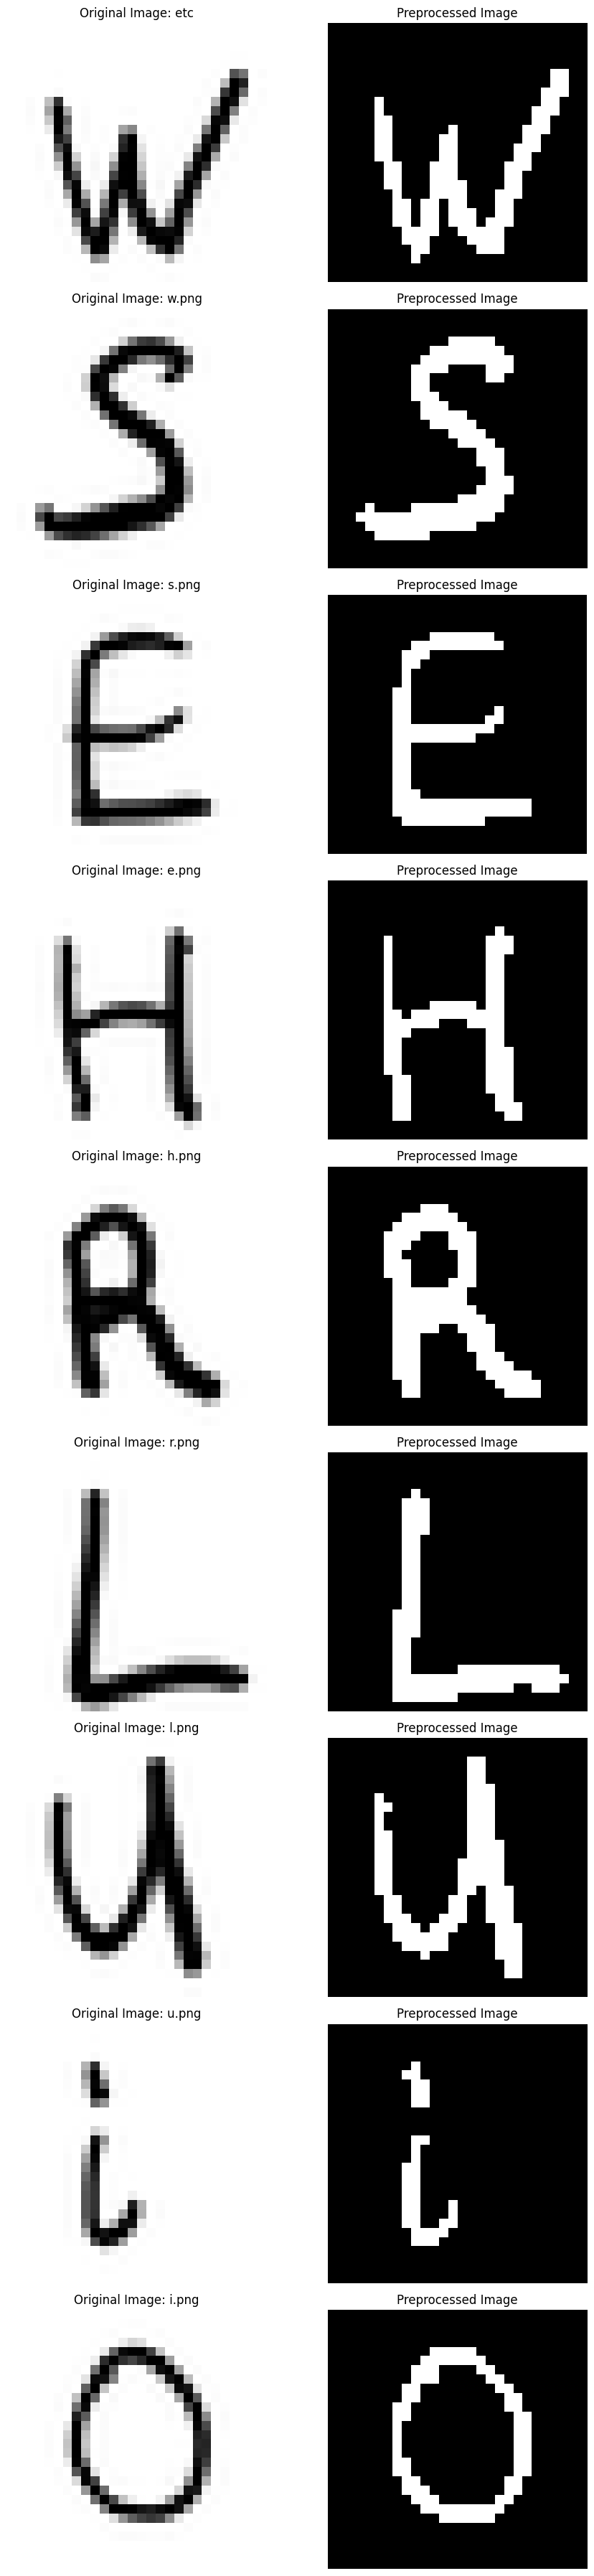

Shape of processed array: (9, 28, 28)
true_labels ['W', 'S', 'E', 'H', 'R', 'L', 'U', 'I', 'O']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
predicted_letters ['W', 'S', 'E', 'H', 'R', 'L', 'W', 'J', 'Q']


In [ ]:
img_dir = 'img/letters/ipad/letters'

all_files = os.listdir(img_dir)

print(f"Total images found: {len(all_files)}")

print("Files:", all_files)


# Initialize lists to hold original and processed images, along with labels
original_images = []
processed_images = []
true_labels = []

for filename in all_files:
    file_path = os.path.join(img_dir, filename)

    # Preprocess the image
    original_img, processed_img = preprocess_image(file_path, 100)

    if processed_img is not None:
        # Append to lists
        original_images.append(original_img)
        processed_images.append(processed_img)

        # Extract the true label from the filename (single letter, case-insensitive)
        label = filename[0].upper()
        true_labels.append(label)

print(f"Total processed images: {len(processed_images)}")

# Number of images to display
num_display = min(11, len(original_images))  # Adjust as needed

plt.figure(figsize=(10, 4 * num_display))

for i in range(num_display):
    # Original Image
    plt.subplot(num_display, 2, 2*i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f"Original Image: {all_files[i]}")
    plt.axis('off')

    # Preprocessed Image
    plt.subplot(num_display, 2, 2*i + 2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')

plt.tight_layout()
plt.show()

processed_array = np.array(processed_images)
true_letters = true_labels
print(f"Shape of processed array: {processed_array.shape}")

print('true_labels', true_labels)

# Make predictions
predictions = loaded_model.predict(processed_array)

# Convert predictions to class indices
predicted_indices = np.argmax(predictions, axis=1)

predicted_letters = [mapping.get(str(label + 10), 'Unknown') for label in predicted_indices]

print('predicted_letters', predicted_letters)

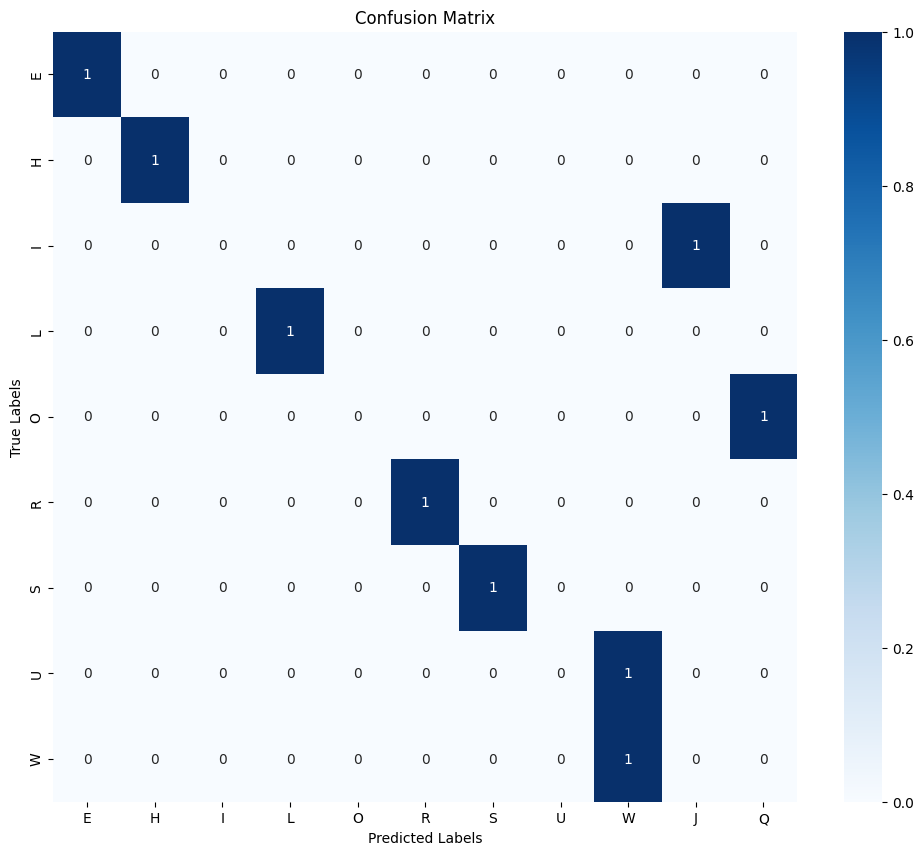

In [ ]:
# Unique labels in true and predicted
true_class_names = np.unique(true_letters)
predicted_class_names = np.unique(predicted_letters)

# Start columns with labels from true_class_names and add extra ones from predicted_class_names
all_predicted_class_names = np.concatenate([true_class_names, np.setdiff1d(predicted_class_names, true_class_names)])

# Generate the confusion matrix with all labels in the combined set
cm = confusion_matrix(true_letters, predicted_letters, labels=all_predicted_class_names)

# Convert to DataFrame and select only relevant rows and columns
cm_df = pd.DataFrame(cm, index=all_predicted_class_names, columns=all_predicted_class_names)
cm_df = cm_df.reindex(index=true_class_names, columns=all_predicted_class_names, fill_value=0)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Simple model

In [ ]:
from tensorflow.keras.models import load_model

save_dir = '/content/drive/MyDrive/HSLU/CV/Project/saved_models'

loaded_model = load_model(os.path.join(save_dir, 'simple_model.h5'))

In [ ]:
original_images = 0
processed_images = 0
true_labels = 0

Total images found: 10
Files: ['etc', 'w.png', 's.png', 'e.png', 'h.png', 'r.png', 'l.png', 'u.png', 'i.png', 'o.png']
Error processing img/letters/ipad/letters/etc: [Errno 21] Is a directory: '/content/drive/MyDrive/HSLU/CV/Project/img/letters/ipad/letters/etc'
Total processed images: 9


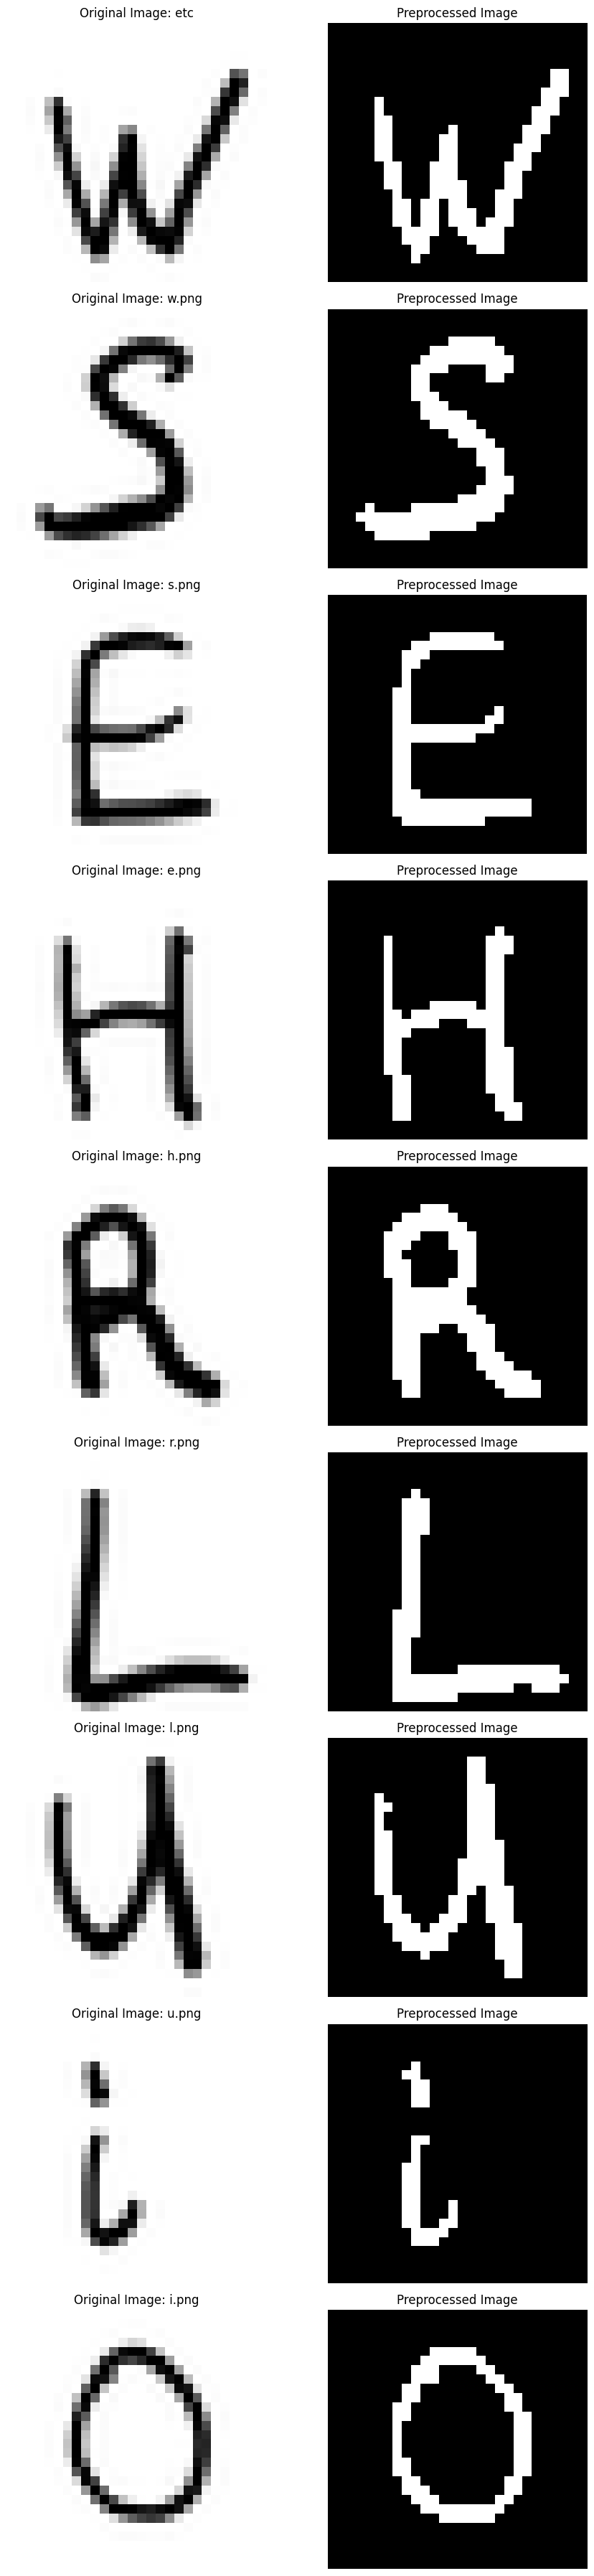

Shape of processed array: (9, 28, 28)
true_labels ['W', 'S', 'E', 'H', 'R', 'L', 'U', 'I', 'O']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
predicted_letters ['W', 'S', 'E', 'H', 'R', 'L', 'U', 'I', 'O']


In [ ]:
img_dir = 'img/letters/ipad/letters'

all_files = os.listdir(img_dir)

print(f"Total images found: {len(all_files)}")

print("Files:", all_files)


# Initialize lists to hold original and processed images, along with labels
original_images = []
processed_images = []
true_labels = []

for filename in all_files:
    file_path = os.path.join(img_dir, filename)

    # Preprocess the image
    original_img, processed_img = preprocess_image(file_path, 100)

    if processed_img is not None:
        # Append to lists
        original_images.append(original_img)
        processed_images.append(processed_img)

        # Extract the true label from the filename (single letter, case-insensitive)
        label = filename[0].upper()
        true_labels.append(label)

print(f"Total processed images: {len(processed_images)}")

# Number of images to display
num_display = min(11, len(original_images))  # Adjust as needed

plt.figure(figsize=(10, 4 * num_display))

for i in range(num_display):
    # Original Image
    plt.subplot(num_display, 2, 2*i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f"Original Image: {all_files[i]}")
    plt.axis('off')

    # Preprocessed Image
    plt.subplot(num_display, 2, 2*i + 2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')

plt.tight_layout()
plt.show()

processed_array = np.array(processed_images)
true_letters = true_labels
print(f"Shape of processed array: {processed_array.shape}")

print('true_labels', true_labels)

# Make predictions
predictions = loaded_model.predict(processed_array)

# Convert predictions to class indices
predicted_indices = np.argmax(predictions, axis=1)

predicted_letters = [mapping.get(str(label + 10), 'Unknown') for label in predicted_indices]

print('predicted_letters', predicted_letters)

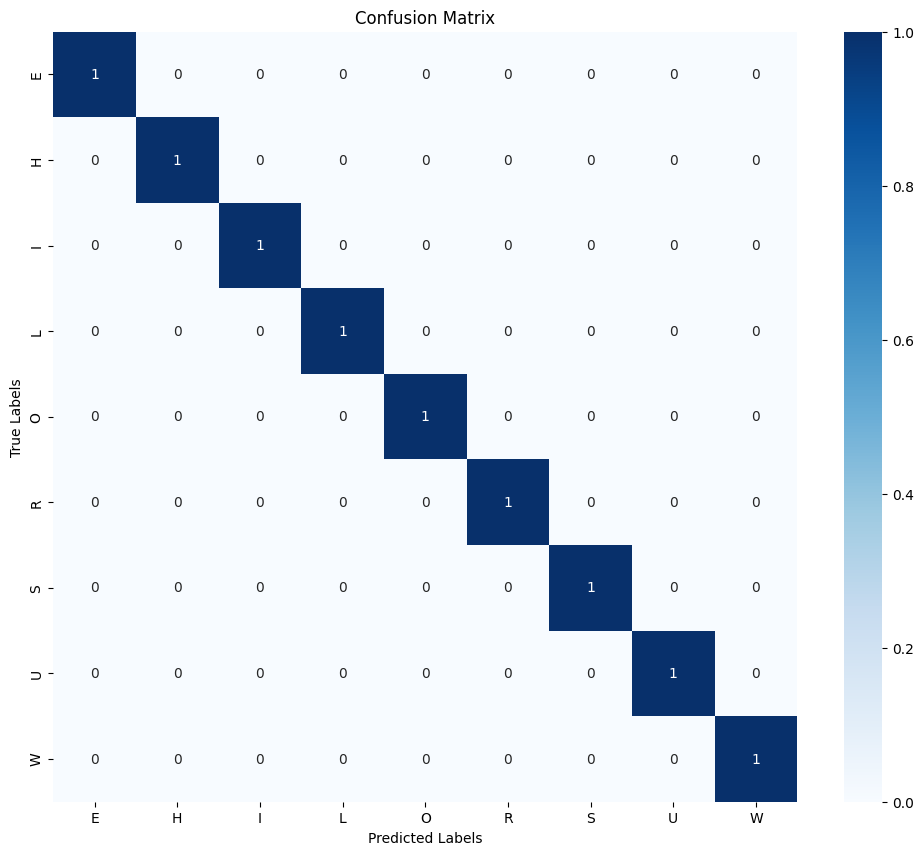

In [ ]:
# Unique labels in true and predicted
true_class_names = np.unique(true_letters)
predicted_class_names = np.unique(predicted_letters)

# Start columns with labels from true_class_names and add extra ones from predicted_class_names
all_predicted_class_names = np.concatenate([true_class_names, np.setdiff1d(predicted_class_names, true_class_names)])

# Generate the confusion matrix with all labels in the combined set
cm = confusion_matrix(true_letters, predicted_letters, labels=all_predicted_class_names)

# Convert to DataFrame and select only relevant rows and columns
cm_df = pd.DataFrame(cm, index=all_predicted_class_names, columns=all_predicted_class_names)
cm_df = cm_df.reindex(index=true_class_names, columns=all_predicted_class_names, fill_value=0)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Other symbols: Cyrillic, German, Signs

In [ ]:
original_images = 0
processed_images = 0
true_labels = 0

Total images found: 9
Files: ['п.png', 'ö.png', 'star.png', '5.png', 'smile.png', 'и.png', 'ц.png', 'ф.png', 'ш.png']
Total processed images: 9


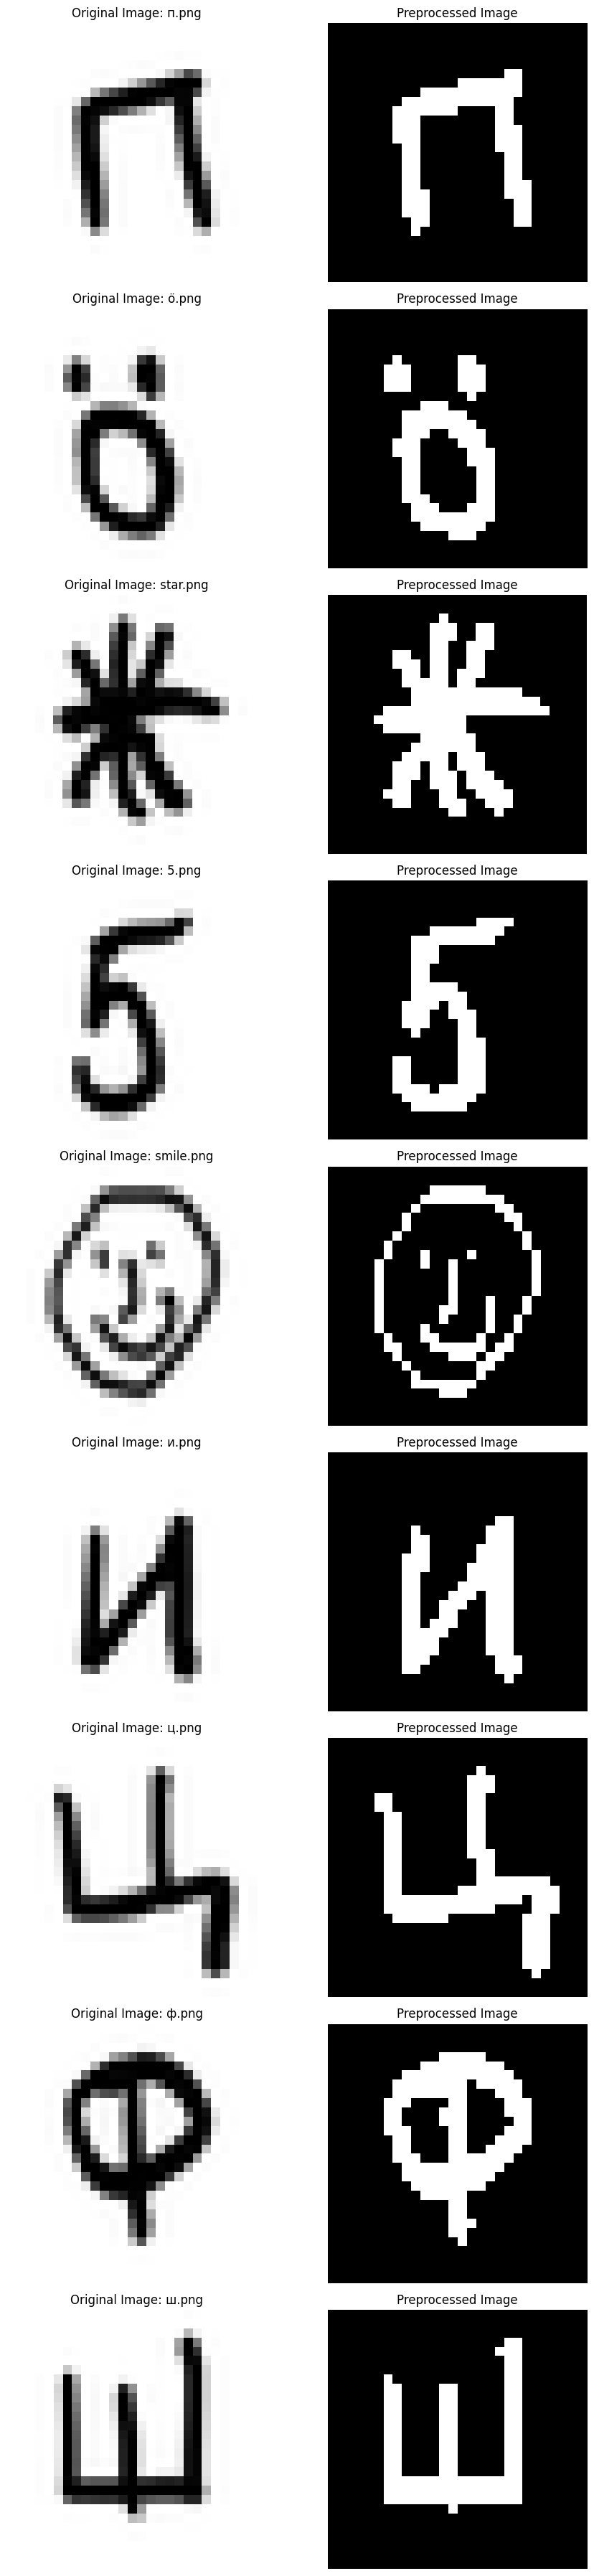

Shape of processed array: (9, 28, 28)
true_labels ['П', 'O', 'S', '5', 'S', 'И', 'Ц', 'Ф', 'Ш']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted_letters ['n', 'B', 'K', 'G', 'Q', 'n', 'U', 'P', 'W']


In [ ]:
img_dir = 'img/letters/ipad/letters/etc'

all_files = os.listdir(img_dir)

print(f"Total images found: {len(all_files)}")

print("Files:", all_files)


# Initialize lists to hold original and processed images, along with labels
original_images = []
processed_images = []
true_labels = []

for filename in all_files:
    file_path = os.path.join(img_dir, filename)

    # Preprocess the image
    original_img, processed_img = preprocess_image(file_path, 100)

    if processed_img is not None:
        # Append to lists
        original_images.append(original_img)
        processed_images.append(processed_img)

        # Extract the true label from the filename (single letter, case-insensitive)
        label = filename[0].upper()
        true_labels.append(label)

print(f"Total processed images: {len(processed_images)}")

# Number of images to display
num_display = min(11, len(original_images))  # Adjust as needed

plt.figure(figsize=(10, 4 * num_display))

for i in range(num_display):
    # Original Image
    plt.subplot(num_display, 2, 2*i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f"Original Image: {all_files[i]}")
    plt.axis('off')

    # Preprocessed Image
    plt.subplot(num_display, 2, 2*i + 2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')

plt.tight_layout()
plt.show()

processed_array = np.array(processed_images)
true_letters = true_labels
print(f"Shape of processed array: {processed_array.shape}")

print('true_labels', true_labels)

# Make predictions
predictions = loaded_model.predict(processed_array)

# Convert predictions to class indices
predicted_indices = np.argmax(predictions, axis=1)

predicted_letters = [mapping.get(str(label + 10), 'Unknown') for label in predicted_indices]

print('predicted_letters', predicted_letters)

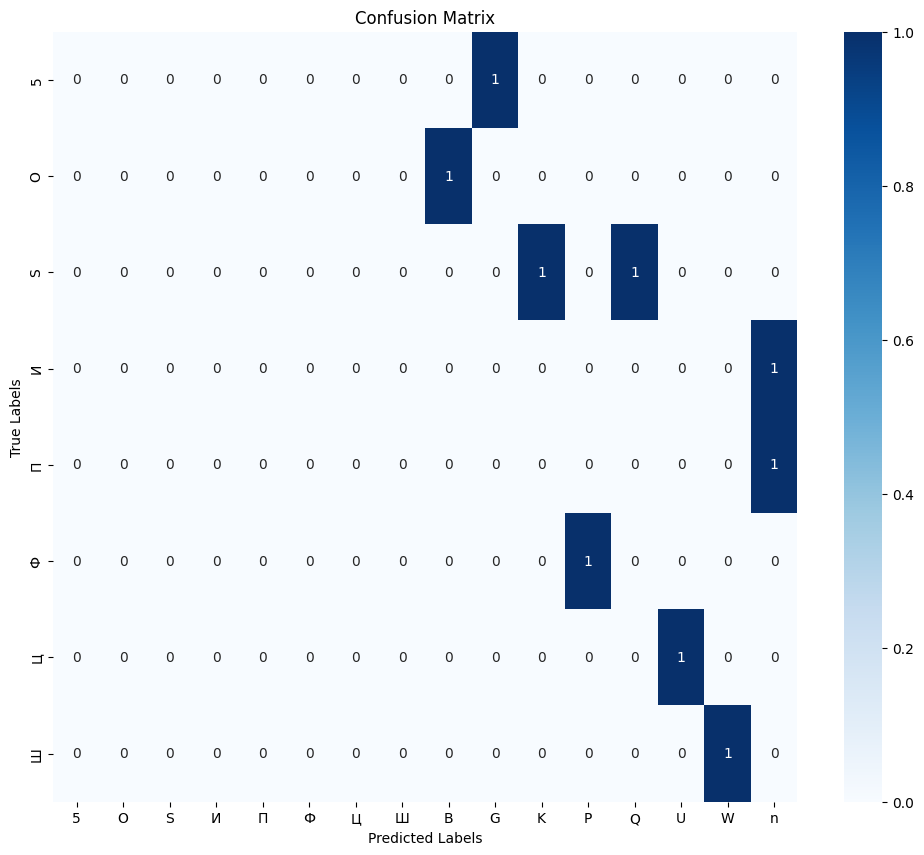

In [ ]:
# Unique labels in true and predicted
true_class_names = np.unique(true_letters)
predicted_class_names = np.unique(predicted_letters)

# Start columns with labels from true_class_names and add extra ones from predicted_class_names
all_predicted_class_names = np.concatenate([true_class_names, np.setdiff1d(predicted_class_names, true_class_names)])

# Generate the confusion matrix with all labels in the combined set
cm = confusion_matrix(true_letters, predicted_letters, labels=all_predicted_class_names)

# Convert to DataFrame and select only relevant rows and columns
cm_df = pd.DataFrame(cm, index=all_predicted_class_names, columns=all_predicted_class_names)
cm_df = cm_df.reindex(index=true_class_names, columns=all_predicted_class_names, fill_value=0)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

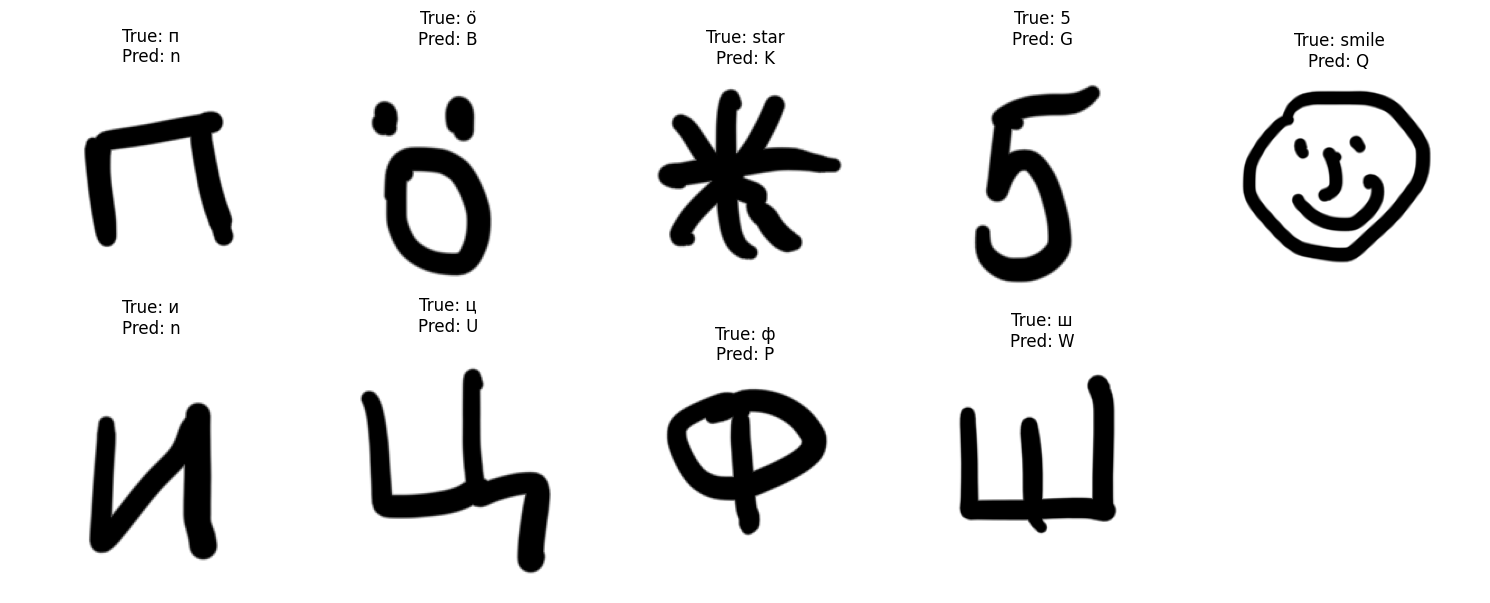

In [ ]:


def display_images_with_labels(file_names, predicted_labels, image_dir, num_images):
    num_images = min(num_images, len(file_names), len(predicted_labels))

    # Define grid size
    cols = 5
    rows = (num_images // cols) + (num_images % cols > 0)

    plt.figure(figsize=(15, rows * 3))

    for i in range(num_images):
        file_path = os.path.join(image_dir, file_names[i])
        image = Image.open(file_path).convert('L')  # Load and convert image to grayscale

        # Extract true label from filename (without extension)
        true_label = os.path.splitext(file_names[i])[0]

        plt.subplot(rows, cols, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(f"True: {true_label}\nPred: {predicted_labels[i]}")

    plt.tight_layout()
    plt.show()

# Example usage
display_images_with_labels(all_files, predicted_letters, img_dir, len(all_files))


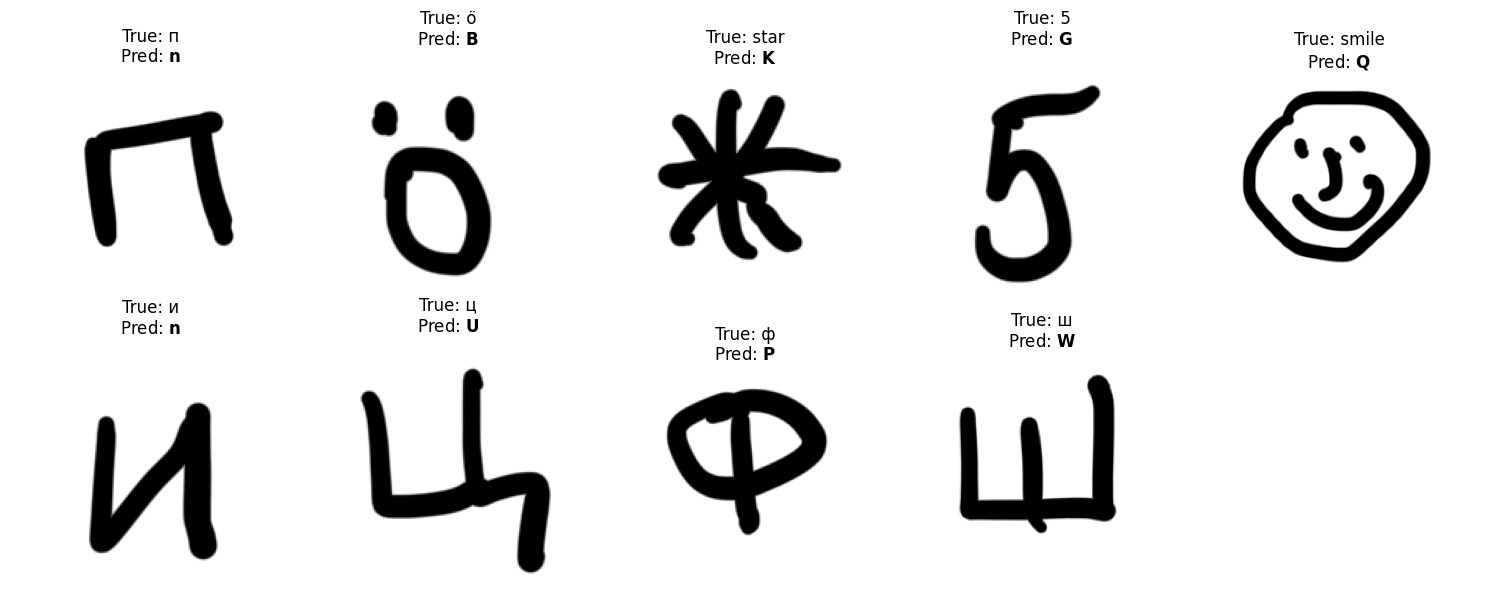

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_images_with_labels(file_names, predicted_labels, image_dir, num_images):
    num_images = min(num_images, len(file_names), len(predicted_labels))

    # Define grid size
    cols = 5
    rows = (num_images // cols) + (num_images % cols > 0)

    plt.figure(figsize=(15, rows * 3))

    for i in range(num_images):
        file_path = os.path.join(image_dir, file_names[i])
        image = Image.open(file_path).convert('L')  # Load and convert image to grayscale

        # Extract true label from filename (without extension)
        true_label = os.path.splitext(file_names[i])[0]

        plt.subplot(rows, cols, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        # Make the predicted label bold
        plt.title(f"True: {true_label}\nPred: " + r"$\mathbf{" + predicted_labels[i] + "}$", fontsize=12)

    plt.tight_layout()
    plt.show()

# Example usage
display_images_with_labels(all_files, predicted_letters, img_dir, len(all_files))


## Object detection

#### 'Vision'

In [230]:
# Define the path to the 'img/letters/ipad/letters' folder
img_dir = 'img/letters/ipad'
image_name = 'vision.png'
image_path = os.path.join(img_dir, image_name)

# Load the image
image = cv2.imread(image_path)

# Verify if the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")
else:
    print(f"Image {image_name} loaded successfully.")


Image vision.png loaded successfully.


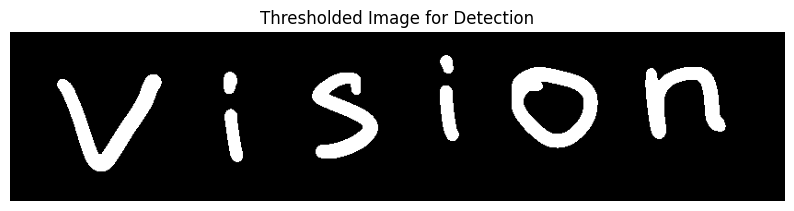

In [231]:
def preprocess_image_for_detection(image):
    """
    Preprocesses the image for letter detection.

    Steps:
    - Convert to grayscale.
    - Apply Gaussian Blur to reduce noise.
    - Invert colors (assuming black background).
    - Apply binary thresholding.

    Args:
    - image (numpy.ndarray): Original BGR image.

    Returns:
    - thresh (numpy.ndarray): Thresholded binary image.
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Invert colors: if background is white, make it black and vice versa
    inverted = cv2.bitwise_not(blurred)

    # Apply binary thresholding
    _, thresh = cv2.threshold(inverted, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    return thresh

# Preprocess the image
thresh = preprocess_image_for_detection(image)

# Display the thresholded image (optional)
plt.figure(figsize=(10, 6))
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image for Detection')
plt.axis('off')
plt.show()


Selective search

In [232]:
# Initialize Selective Search
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

# Set the input image
ss.setBaseImage(image)

# Switch to 'fast' or 'quality' mode
ss.switchToSelectiveSearchFast()  # Alternatively, use 'switchToSelectiveSearchQuality()' for better results but slower

# Run Selective Search to get region proposals
rects = ss.process()

print(f"Total Region Proposals: {len(rects)}")


Total Region Proposals: 147


In [233]:
# Define a function to filter regions based on size and aspect ratio
def filter_regions(rects, image_area, min_size=100, max_size=10000, aspect_ratio_range=(0.2, 1.0)):
    """
    Filters region proposals based on size and aspect ratio.

    Args:
    - rects (list): List of region proposals (x, y, w, h).
    - image_area (int): Total area of the image.
    - min_size (int): Minimum area of the region.
    - max_size (int): Maximum area of the region.
    - aspect_ratio_range (tuple): Min and max aspect ratio.

    Returns:
    - filtered_rects (list): Filtered list of regions.
    """
    filtered_rects = []
    for (x, y, w, h) in rects:
        area = w * h
        aspect_ratio = w / float(h)
        if (min_size < area < max_size) and (aspect_ratio_range[0] < aspect_ratio < aspect_ratio_range[1]):
            filtered_rects.append((x, y, w, h))
    return filtered_rects

# Get image area
image_area = image.shape[0] * image.shape[1]

# Filter regions
filtered_rects = filter_regions(rects, image_area)

print(f"Filtered Regions: {len(filtered_rects)}")


Filtered Regions: 84


In [234]:
import imutils
from imutils.object_detection import non_max_suppression

# Convert filtered_rects to numpy array of the format [x1, y1, x2, y2]
boxes = []
for (x, y, w, h) in filtered_rects:
    boxes.append([x, y, x + w, y + h])

boxes = np.array(boxes)

# Apply Non-Maximum Suppression
pick = non_max_suppression(boxes, probs=None, overlapThresh=0.3)

print(f"Regions after NMS: {len(pick)}")


Regions after NMS: 11


In [235]:
# Sort the bounding boxes from left to right
def sort_boxes_left_to_right(boxes):
    """
    Sorts bounding boxes from left to right based on the x-coordinate.

    Args:
    - boxes (numpy.ndarray): Array of bounding boxes [x1, y1, x2, y2].

    Returns:
    - sorted_boxes (list): Sorted list of bounding boxes.
    """
    # Sort by the x1 coordinate
    sorted_boxes = sorted(boxes, key=lambda b: b[0])
    return sorted_boxes

sorted_boxes = sort_boxes_left_to_right(pick)

print(f"Sorted Boxes: {len(sorted_boxes)}")


Sorted Boxes: 11


Visualization

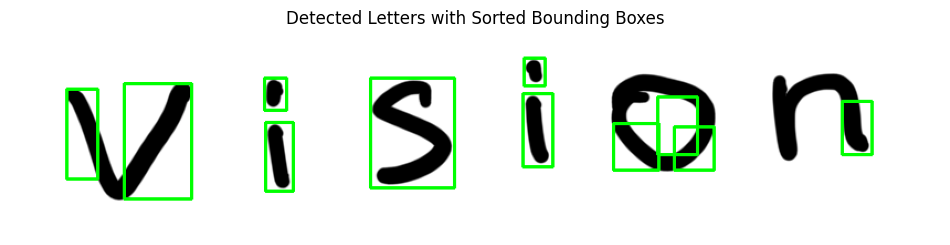

In [236]:
# Draw sorted bounding boxes on the image
image_sorted = image.copy()
for (x1, y1, x2, y2) in sorted_boxes:
    cv2.rectangle(image_sorted, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Convert BGR to RGB for displaying
image_sorted_rgb = cv2.cvtColor(image_sorted, cv2.COLOR_BGR2RGB)

# Display the image with sorted bounding boxes
plt.figure(figsize=(12, 8))
plt.imshow(image_sorted_rgb)
plt.title('Detected Letters with Sorted Bounding Boxes')
plt.axis('off')
plt.show()


Preprocess Detected Letter Regions for Classification

In [237]:
def preprocess_letter_roi(image, bbox):
    """
    Extracts and preprocesses the letter ROI based on the bounding box.

    Steps:
    - Extract ROI.
    - Convert to grayscale.
    - Resize to 28x28 pixels.
    - Invert colors.
    - Normalize pixel values to [0, 1].

    Args:
    - image (numpy.ndarray): Original BGR image.
    - bbox (tuple): Bounding box [x1, y1, x2, y2].

    Returns:
    - processed_letter (numpy.ndarray): Preprocessed letter image ready for classification.
    """
    x1, y1, x2, y2 = bbox
    roi = image[y1:y2, x1:x2]

    # Convert to grayscale
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Resize to 28x28
    roi_resized = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)

    # Invert colors if necessary (assuming model expects black background)
    roi_inverted = cv2.bitwise_not(roi_resized)

    # Normalize to [0,1]
    roi_normalized = roi_inverted.astype('float32') / 255.0

    # Reshape to match model input (1, 28, 28, 1)
    processed_letter = roi_normalized.reshape(1, 28, 28, 1)

    return processed_letter


Classification

In [238]:
loaded_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 37)                  │           2,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,079 (371.41 KB)

 Trainable params: 95,077 (371.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [240]:
class_names = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
    'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',  # 26 Uppercase Letters
    'a','b','d','e','f','g','h','n','q','r','t']

In [241]:
# Initialize an empty list to hold classified letters
classified_letters = []

for idx, bbox in enumerate(sorted_boxes):
    # Preprocess the letter ROI
    processed_letter = preprocess_letter_roi(image, bbox)

    # Predict using the loaded model
    prediction = loaded_model.predict(processed_letter)

    # Get the predicted class index
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class index to the corresponding letter
    # Ensure that 'class_names' is defined and corresponds to your model's classes
    if predicted_class < len(class_names):
        predicted_letter = class_names[predicted_class]
    else:
        predicted_letter = 'Unknown'

    # Append the predicted letter to the list
    classified_letters.append(predicted_letter)

    # Print the prediction result
    confidence = prediction[0][predicted_class]
    print(f"Letter {idx+1}: Predicted as '{predicted_letter}' with confidence {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Letter 1: Predicted as 'Y' with confidence 0.96
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Letter 2: Predicted as 'L' with confidence 0.67
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Letter 3: Predicted as 'B' with confidence 0.65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Letter 4: Predicted as 'r' with confidence 0.36
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Letter 5: Predicted as 'S' with confidence 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Letter 6: Predicted as 'a' with confidence 0.33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Letter 7: Predicted as 'q' with confidence 0.79
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Letter 8: Predicted as 'r' with confidence 0.43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Letter 9: Predicted as 'I' with confidence 0.63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Letter 10: Predicted as 'P' with confidence 0.32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Letter 11: Predicted as 'L' with confidence 0.28


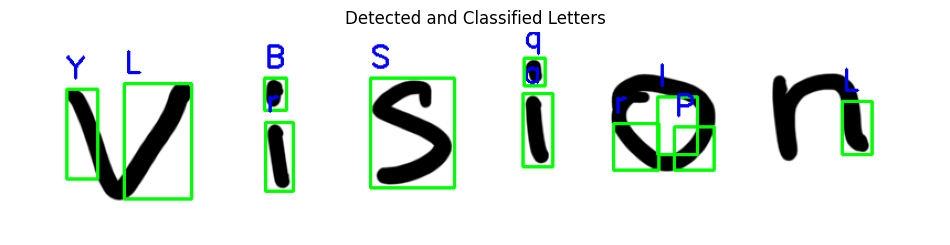

In [242]:
# Create a copy of the original image for visualization
image_with_predictions = image.copy()

for idx, bbox in enumerate(sorted_boxes):
    x1, y1, x2, y2 = bbox
    predicted_letter = classified_letters[idx]

    # Draw bounding box
    cv2.rectangle(image_with_predictions, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put the predicted letter text above the bounding box
    cv2.putText(image_with_predictions, predicted_letter, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Convert BGR to RGB for displaying
image_with_predictions_rgb = cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB)

# Display the image with predictions
plt.figure(figsize=(12, 8))
plt.imshow(image_with_predictions_rgb)
plt.title('Detected and Classified Letters')
plt.axis('off')
plt.show()


#### "world"

In [243]:
# Define the path to the 'img/letters/ipad/letters' folder
img_dir = 'img/letters/ipad'
image_name = 'world.png'
image_path = os.path.join(img_dir, image_name)

# Load the image
image = cv2.imread(image_path)

# Verify if the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")
else:
    print(f"Image {image_name} loaded successfully.")


Image world.png loaded successfully.


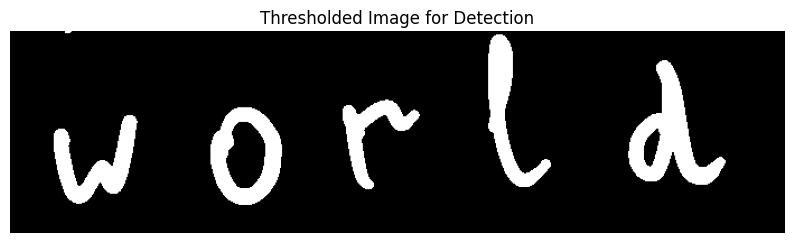

In [244]:
def preprocess_image_for_detection(image):
    """
    Preprocesses the image for letter detection.

    Steps:
    - Convert to grayscale.
    - Apply Gaussian Blur to reduce noise.
    - Invert colors (assuming black background).
    - Apply binary thresholding.

    Args:
    - image (numpy.ndarray): Original BGR image.

    Returns:
    - thresh (numpy.ndarray): Thresholded binary image.
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Invert colors: if background is white, make it black and vice versa
    inverted = cv2.bitwise_not(blurred)

    # Apply binary thresholding
    _, thresh = cv2.threshold(inverted, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    return thresh

# Preprocess the image
thresh = preprocess_image_for_detection(image)

# Display the thresholded image (optional)
plt.figure(figsize=(10, 6))
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image for Detection')
plt.axis('off')
plt.show()


Selective search

In [245]:
# Initialize Selective Search
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

# Set the input image
ss.setBaseImage(image)

# Switch to 'fast' or 'quality' mode
ss.switchToSelectiveSearchFast()  # Alternatively, use 'switchToSelectiveSearchQuality()' for better results but slower

# Run Selective Search to get region proposals
rects = ss.process()

print(f"Total Region Proposals: {len(rects)}")


Total Region Proposals: 128


In [246]:
# Define a function to filter regions based on size and aspect ratio
def filter_regions(rects, image_area, min_size=100, max_size=10000, aspect_ratio_range=(0.2, 1.0)):
    """
    Filters region proposals based on size and aspect ratio.

    Args:
    - rects (list): List of region proposals (x, y, w, h).
    - image_area (int): Total area of the image.
    - min_size (int): Minimum area of the region.
    - max_size (int): Maximum area of the region.
    - aspect_ratio_range (tuple): Min and max aspect ratio.

    Returns:
    - filtered_rects (list): Filtered list of regions.
    """
    filtered_rects = []
    for (x, y, w, h) in rects:
        area = w * h
        aspect_ratio = w / float(h)
        if (min_size < area < max_size) and (aspect_ratio_range[0] < aspect_ratio < aspect_ratio_range[1]):
            filtered_rects.append((x, y, w, h))
    return filtered_rects

# Get image area
image_area = image.shape[0] * image.shape[1]

# Filter regions
filtered_rects = filter_regions(rects, image_area)

print(f"Filtered Regions: {len(filtered_rects)}")


Filtered Regions: 81


In [247]:
import imutils
from imutils.object_detection import non_max_suppression

# Convert filtered_rects to numpy array of the format [x1, y1, x2, y2]
boxes = []
for (x, y, w, h) in filtered_rects:
    boxes.append([x, y, x + w, y + h])

boxes = np.array(boxes)

# Apply Non-Maximum Suppression
pick = non_max_suppression(boxes, probs=None, overlapThresh=0.3)

print(f"Regions after NMS: {len(pick)}")


Regions after NMS: 5


In [248]:
# Sort the bounding boxes from left to right
def sort_boxes_left_to_right(boxes):
    """
    Sorts bounding boxes from left to right based on the x-coordinate.

    Args:
    - boxes (numpy.ndarray): Array of bounding boxes [x1, y1, x2, y2].

    Returns:
    - sorted_boxes (list): Sorted list of bounding boxes.
    """
    # Sort by the x1 coordinate
    sorted_boxes = sorted(boxes, key=lambda b: b[0])
    return sorted_boxes

sorted_boxes = sort_boxes_left_to_right(pick)

print(f"Sorted Boxes: {len(sorted_boxes)}")


Sorted Boxes: 5


Visualization

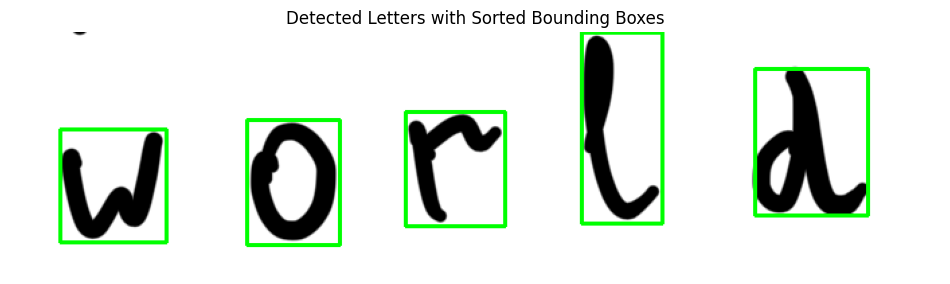

In [249]:
# Draw sorted bounding boxes on the image
image_sorted = image.copy()
for (x1, y1, x2, y2) in sorted_boxes:
    cv2.rectangle(image_sorted, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Convert BGR to RGB for displaying
image_sorted_rgb = cv2.cvtColor(image_sorted, cv2.COLOR_BGR2RGB)

# Display the image with sorted bounding boxes
plt.figure(figsize=(12, 8))
plt.imshow(image_sorted_rgb)
plt.title('Detected Letters with Sorted Bounding Boxes')
plt.axis('off')
plt.show()


Preprocess Detected Letter Regions for Classification

In [250]:
def preprocess_letter_roi(image, bbox):
    """
    Extracts and preprocesses the letter ROI based on the bounding box.

    Steps:
    - Extract ROI.
    - Convert to grayscale.
    - Resize to 28x28 pixels.
    - Invert colors.
    - Normalize pixel values to [0, 1].

    Args:
    - image (numpy.ndarray): Original BGR image.
    - bbox (tuple): Bounding box [x1, y1, x2, y2].

    Returns:
    - processed_letter (numpy.ndarray): Preprocessed letter image ready for classification.
    """
    x1, y1, x2, y2 = bbox
    roi = image[y1:y2, x1:x2]

    # Convert to grayscale
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Resize to 28x28
    roi_resized = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)

    # Invert colors if necessary (assuming model expects black background)
    roi_inverted = cv2.bitwise_not(roi_resized)

    # Normalize to [0,1]
    roi_normalized = roi_inverted.astype('float32') / 255.0

    # Reshape to match model input (1, 28, 28, 1)
    processed_letter = roi_normalized.reshape(1, 28, 28, 1)

    return processed_letter


Classification

In [251]:
loaded_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 37)                  │           2,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,079 (371.41 KB)

 Trainable params: 95,077 (371.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [252]:
class_names = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
    'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',  # 26 Uppercase Letters
    'a','b','d','e','f','g','h','n','q','r','t']                   # 11 lowercase

In [253]:
# Initialize an empty list to hold classified letters
classified_letters = []

for idx, bbox in enumerate(sorted_boxes):
    # Preprocess the letter ROI
    processed_letter = preprocess_letter_roi(image, bbox)

    # Predict using the loaded model
    prediction = loaded_model.predict(processed_letter)

    # Get the predicted class index
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class index to the corresponding letter
    # Ensure that 'class_names' is defined and corresponds to your model's classes
    if predicted_class < len(class_names):
        predicted_letter = class_names[predicted_class]
    else:
        predicted_letter = 'Unknown'

    # Append the predicted letter to the list
    classified_letters.append(predicted_letter)

    # Print the prediction result
    confidence = prediction[0][predicted_class]
    print(f"Letter {idx+1}: Predicted as '{predicted_letter}' with confidence {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Letter 1: Predicted as 'W' with confidence 0.96
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Letter 2: Predicted as 'O' with confidence 0.73
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Letter 3: Predicted as 'r' with confidence 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Letter 4: Predicted as 'L' with confidence 0.94
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Letter 5: Predicted as 'd' with confidence 0.96


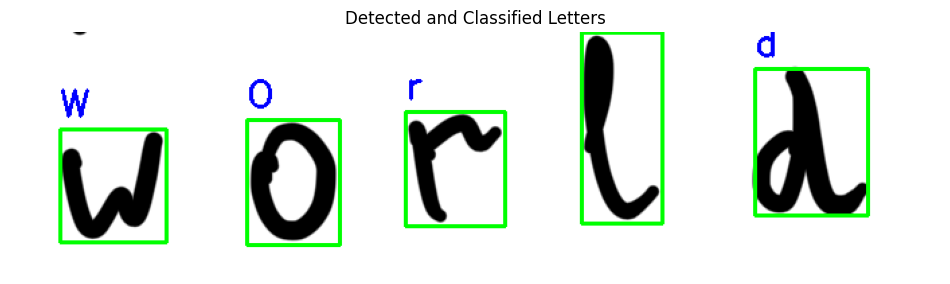

In [254]:
# Create a copy of the original image for visualization
image_with_predictions = image.copy()

for idx, bbox in enumerate(sorted_boxes):
    x1, y1, x2, y2 = bbox
    predicted_letter = classified_letters[idx]

    # Draw bounding box
    cv2.rectangle(image_with_predictions, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put the predicted letter text above the bounding box
    cv2.putText(image_with_predictions, predicted_letter, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Convert BGR to RGB for displaying
image_with_predictions_rgb = cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB)

# Display the image with predictions
plt.figure(figsize=(12, 19))
plt.imshow(image_with_predictions_rgb)
plt.title('Detected and Classified Letters')
plt.axis('off')
plt.show()


In [255]:
# Combine the classified letters into a single word
detected_word = ''.join(classified_letters)

print(f"Detected Word: {detected_word}")


Detected Word: WOrLd


## Translation

In [281]:
# !pip install googletrans==3.1.0a0   # to install on Colab
from googletrans import Translator

def translate_word(word):
    translator = Translator()
    translation_ge = translator.translate(word, src='en', dest='de')
    translation_ua = translator.translate(word, src='en', dest='uk')
    translation = translator.translate(word, src='en', dest='ru')
    translation1 = translator.translate(word, src='en', dest='es')
    return '\nGerman: ' + translation_ge.text + '\nUkrainian: ' + translation_ua.text + \
     '\nSpanish: ' + translation1.text + '\nRussian: '+ translation.text
# example usage
en_words = [detected_word]
for word in en_words:
    translation = translate_word(word)
    print(f"{word}: {translation}")

WOrLd: 
German: Welt
Ukrainian: СВІТ
Spanish: Mundo
Russian: Мир


## Notes

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [ ]:

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Ensure train_labels are in the correct range (0-36)
print(np.unique(train_labels))  # Check unique values

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(37, activation='softmax')  # 36 letters + 1 for unknown
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46]
Epoch 1/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0275 - loss: nan - val_accuracy: 0.0270 - val_loss: nan
Epoch 2/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0276 - loss: nan - val_accuracy: 0.0270 - val_loss: nan
Epoch 3/5
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0270 - loss: nan - val_accuracy: 0.0270 - val_loss: nan
Epoch 4/5
1138/1388 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0261 - loss: nan

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,
          9,  32,  37,  21,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,  46, 114,
        140, 204, 215, 170,  78,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   7,  90, 207, 244,
        246, 249, 250, 251, 206,  46,   8,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,  27, 186, 231, 204,
        140, 127, 141, 222, 245, 128,  47,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  

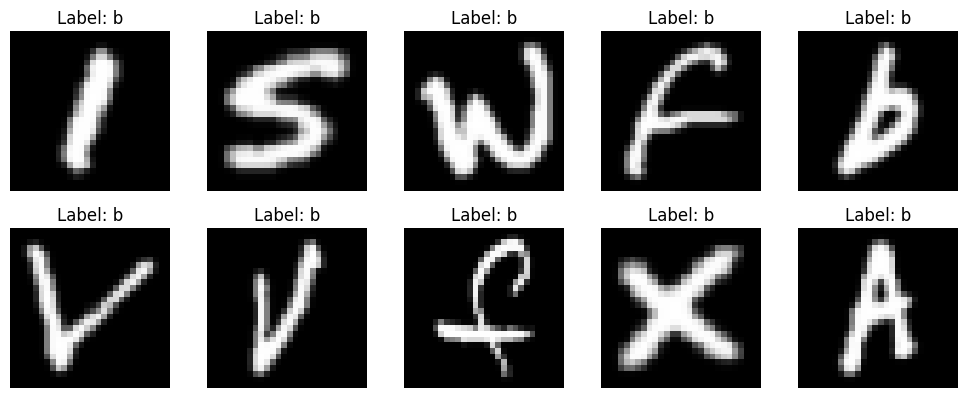

In [ ]:
def plot_random_images(images, labels, mapping, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        # Select a random index
        idx = np.random.randint(0, len(images))

        # Get the corresponding image and label
        img = images[idx]
        label = labels[idx]

        # Map label to character using the dictionary
        label_char = mapping.get(label, 'b')  # '?' for unmapped labels

        # Plot the image with label
        plt.subplot(5, 5, i + 1)  # Adjust rows/cols based on num_images
        plt.imshow(img.squeeze(), cmap='gray')  # Squeeze to remove single channel dimension if present
        plt.title(f"Label: {label_char}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_random_images(train_images, train_labels, mapping, num_images=10)

In [ ]:
len(np.unique(train_labels))

37

G


(-0.5, 27.5, 27.5, -0.5)

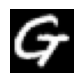

In [ ]:
idx = 8
print(mapping[str(test_labels[idx])])



plt.subplot(5, 5, 1)  # Adjust rows/cols based on num_images
plt.imshow(test_images[idx].squeeze(), cmap='gray')  # Squeeze to remove single channel dimension if present
# plt.title(f"Label: {label_char}")
plt.axis('off')

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568627, 0.03529412, 0.1254902 ,
        0.14509804, 0.0823

In [ ]:
type(train_labels[0])

np.isnan(train_images).any(), np.isnan(train_labels).any()

(False, False)

In [ ]:
len(np.unique(train_labels))

assert not np.isnan(train_images).any(), "train_images contains NaN values"
assert not np.isnan(train_labels).any(), "train_labels contains NaN values"

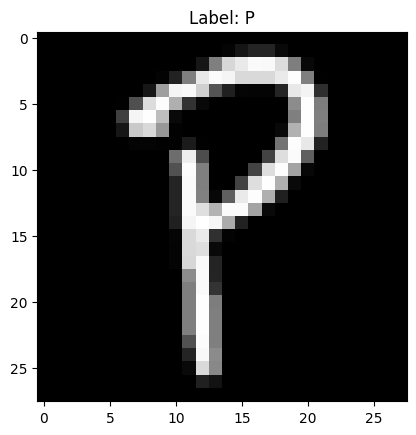

In [ ]:
image_index = 999

# Display the image
plt.imshow(train_images[image_index], cmap='gray')
plt.title(f"Label: {mapping[str(train_labels[image_index])]}") #label into character
plt.show()

## Garbage

In [ ]:

train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568627, 0.03529412, 0.1254902 ,
        0.14509804, 0.0823

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568627, 0.03529412, 0.1254902 ,
        0.14509804, 0.0823

In [ ]:
u_labels = np.unique(train_labels)

[mapping[str(label)] for label in u_labels]

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'd',
 'e',
 'f',
 'g',
 'h',
 'n',
 'q',
 'r',
 't']

In [ ]:

len( np.unique(train_labels))

37

In [ ]:
mapping['11']

'B'

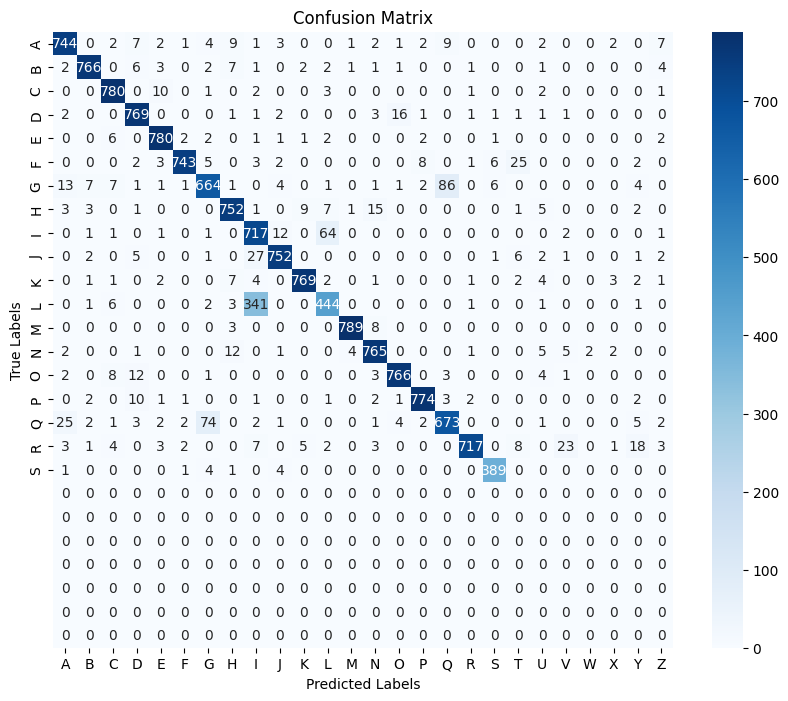

In [ ]:
# prompt: compose a confusion matrix for predicted_chars and true_chars, use sns, but make on graph xlabels above the table not below,

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming predicted_chars and true_chars are already defined from your previous code

cm = confusion_matrix(true_chars, predicted_chars)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(list(set(predicted_chars))),
            yticklabels=sorted(list(set(true_chars))))
plt.xlabel("Predicted Labels", position=(1, -0.08)) # Move xlabel above
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

In [ ]:
print(type(train_labels))
print(train_labels.dtype)

<class 'list'>


AttributeError: 'list' object has no attribute 'dtype'

In [ ]:
model.predict(test_images)


463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([5.80328408e-09, 1.44100323e-01, 2.87445640e-04, 8.53447818e-06,
       2.12905448e-04, 7.08071730e-06, 1.31880997e-05, 1.01850871e-02,
       1.19760734e-05, 3.88151617e-03, 3.95600982e-02, 8.58923727e-07,
       1.46561419e-04, 7.93771804e-09, 1.02834965e-05, 1.24842418e-05,
       1.04227311e-05, 1.59059593e-03, 4.58554041e-06, 7.84042495e-05,
       3.81872633e-06, 9.59553563e-06, 1.31223669e-06, 1.11857652e-07,
       2.54629384e-04, 3.66517366e-03, 7.95943022e-01], dtype=float32)

In [ ]:
len(pr[0])

27

In [ ]:
predicted_labels = np.argmax(model.predict(test_images), axis=1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# print distinct predicted_labels
print(np.unique(test_labels))


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
